# Trabajo Final de Master Universitario en Ciencia de Datos - M2.882 - Área 5 - Aula 1
Predicción de siniestralidad en seguros de viaje mediante aprendizaje automático

Nombre: Julio Morales

Profesor guía: Jorge Segura Gisbert

Profesor Responsable Asignatura: Albert Solé Ribalta

Índice

 1. Setup    
 2. Bussiness Understanging
 3. Data Clean
 4. Exploratory Data Analisys
 5. Preprocessing
 6. Modelling
 7. Evaluation
 8. Deployment


## 1. Setup

### 1.1 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import src.data_clean as data_clean
import src.exploratory_data_analysis as eda
import src.preprocessing as prep
import src.modelling as mod
import src.evaluation as evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings

### 1.2 Environment Variables

In [2]:
DATA_PATH = 'data/input_data/travel insurance.csv'
FEATURE_SELECTED_PATH = 'data/processed_data/feature selected.csv'
BEST_MODEL_PATH = 'models/best_model'
Y_NAME = 'CLAIM'
CAT_VAR_LABEL_ENCODER = ['AGENCY_TYPE', 'DISTRIBUTION_CHANNEL', 'GENDER']
CAT_VAR_ORDINAL_ENCODER = ['COMMISION']
CAT_VAR_ONEHOT_ENCODER = ['AGENCY', 'PRODUCT_NAME']
CAT_VAR_GETDUMMIES_ENCODER = ['DESTINATION']
FINAL_FEATURE_SELECTED = ['DURATION','AGE','NET_SALES','GENDER','AGENCY_TYPE','JZI','C2B','SINGAPORE','Bronze Plan',
                            'Silver Plan','Annual Silver Plan','Cancellation Plan','EPX','MALAYSIA']
THRESHOLD_DESTINATION = 1000
TEST_SIZE = 0.1

df = None
X_df = None
y_df = None
cat_var_df = None 
num_var_df = None 
cat_var_names = [] 
num_var_names = []

X_train = None
X_test = None
y_train = None
y_test = None

models = []
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []


### 1.3 Others Configurations

In [3]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

warnings.filterwarnings("ignore")

## 2. Bussiness Understanding

### 2.1 Features Descriptions

1. Agency: Name of agency [object]
2. Agency Type: Type of travel insurance agencies [object]
3. Distribution Channel: Distribution channel of travel insurance agencies [object]
4. Product Name: Name of the travel insurance products  [object]
5. Claim: Target Claim Status [object]
6. Duration: Duration of travel [float64]
7. Destination: Destination of travel [object]
8. Net Sales: Amount of sales of travel insurance policies [float64]
9. Commision (in value): Commission received for travel insurance agency [float64]
10. Gender: Gender of insured [object]
11. Age: Age of insured [float64]

### 2.2 Business Constraints

1. Net Sales > 0
2. Duration > 0
3. 0 < Age < 100

## 3. Data Clean

### 3.1 Load Data

In [4]:
#Loading the Data
df = pd.read_csv(DATA_PATH) 

#Renaming Columns
df.rename(columns={
    'Agency':'AGENCY',
    'Agency Type': 'AGENCY_TYPE',
    'Distribution Channel': 'DISTRIBUTION_CHANNEL',
    'Product Name': 'PRODUCT_NAME',
    'Claim':'CLAIM',
    'Duration': 'DURATION',
    'Destination': 'DESTINATION',
    'Net Sales': 'NET_SALES',
    'Commision (in value)': 'COMMISION',
    'Gender': 'GENDER',
    'Age': 'AGE'},inplace=True) 

# Print First Few Rows
df.head()

AGENCY    AGENCY_TYPE DISTRIBUTION_CHANNEL                     PRODUCT_NAME  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  CLAIM  DURATION DESTINATION  NET_SALES  COMMISION GENDER  AGE  
0    No       186    MALAYSIA    -29.000      9.570      F   81  
1    No       186    MALAYSIA    -29.000      9.570      F   71  
2    No        65   AUSTRALIA    -49.500     29.700    NaN   32  
3    No        60   AUSTRALIA    -39.600     23.760    NaN   32  
4    No        79       ITALY    -19.800     11.880    NaN   41

### 3.2 Data Description

- Number of records
- Number of columns
. Number of Null records
- Data types of Variables
- General Description of Numeric Variables

In [5]:
data_clean.general_description(df)


General Description:

Number of records:  63326

Number of columns:  11

Number of Null records:
 AGENCY                      0
AGENCY_TYPE                 0
DISTRIBUTION_CHANNEL        0
PRODUCT_NAME                0
CLAIM                       0
DURATION                    0
DESTINATION                 0
NET_SALES                   0
COMMISION                   0
GENDER                  45107
AGE                         0
dtype: int64

Number of Duplicate records:  8042

Data types of Variables:
 AGENCY                   object
AGENCY_TYPE              object
DISTRIBUTION_CHANNEL     object
PRODUCT_NAME             object
CLAIM                    object
DURATION                  int64
DESTINATION              object
NET_SALES               float64
COMMISION               float64
GENDER                   object
AGE                       int64
dtype: object

General Description of Numeric Variables:
        DURATION  NET_SALES  COMMISION       AGE
count 63326.000  63326.000  63326.000

### 3.3 Null Treatment

- Treatment for Gender
- Treatment for Net Sales
- Treatment for Duration
- Treatment for Age

In [6]:
df = data_clean.null_treatment(df)


Null Treatment:


Number of records before null treatment:  (63326, 11)

Treatment for Gender:  (63326, 11)

Number of records after removing duplicates:  (55253, 11)

Number of records after validation for Net Sales > 0:  (52798, 11)

Number of records after validation for Duration > 0:  (52750, 11)

Number of records after validation for 0 < Age < 100:  (52142, 11)

Number of Null records:
 AGENCY                  0
AGENCY_TYPE             0
DISTRIBUTION_CHANNEL    0
PRODUCT_NAME            0
CLAIM                   0
DURATION                0
DESTINATION             0
NET_SALES               0
COMMISION               0
GENDER                  0
AGE                     0
dtype: int64


### 3.4 Assign Features

In [7]:
X_df, y_df, cat_var_df, num_var_df, cat_var_names, num_var_names = data_clean.assign_features(df, Y_NAME)

In [8]:
#Data Clean Saved
df.to_csv('data/processed_data/data_clean.csv', index=False, sep=';')
print("Data Clean Saved: 'data/processed_data/data_clean.csv")

Data Clean Saved: 'data/processed_data/data_clean.csv


## 4. Exploratory Data Analysis

### 4.1 Numerical Data Analysis

- Distribution Histogram
- Distribution Boxplot
- Distribution Q-Q Plot
- Correlation Heatmap


--- Numeric Analysis ---

--- DURATION ---
Basic Statistics:
count   52142.000
mean       52.654
std       108.220
min         1.000
25%        11.000
50%        25.000
75%        57.000
max      4881.000
Name: DURATION, dtype: float64
Shapiro-Wilk Test for DURATION: p-value = 0.0000, Result = not normally distributed


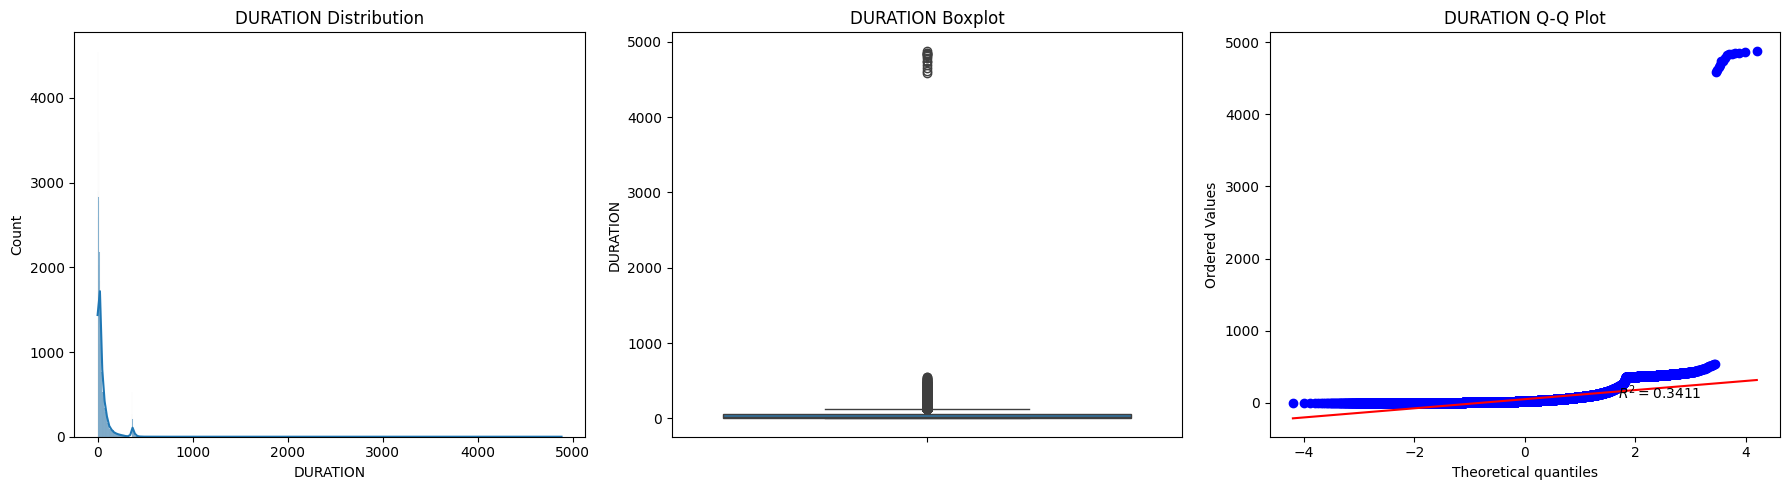


--- NET_SALES ---
Basic Statistics:
count   52142.000
mean       45.427
std        49.158
min         0.130
25%        20.000
50%        29.700
75%        53.000
max       682.000
Name: NET_SALES, dtype: float64
Shapiro-Wilk Test for NET_SALES: p-value = 0.0000, Result = not normally distributed


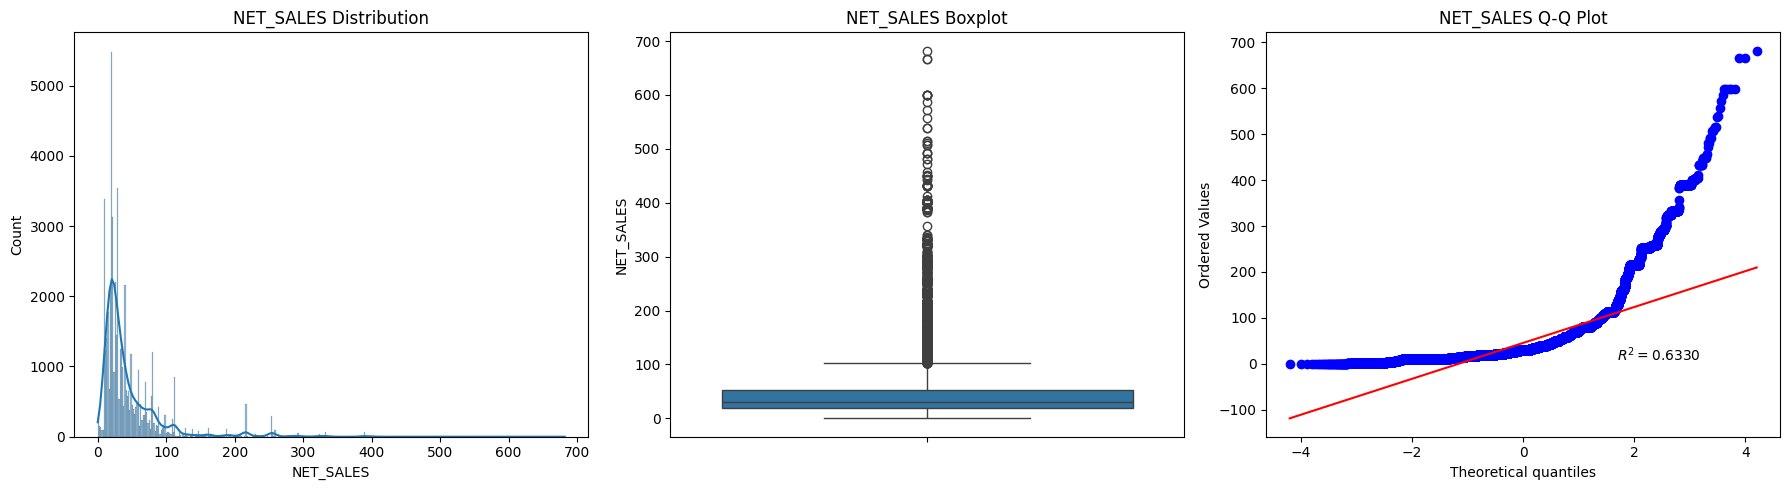


--- COMMISION ---
Basic Statistics:
count   52142.000
mean       10.051
std        20.332
min         0.000
25%         0.000
50%         0.000
75%        11.250
max       262.760
Name: COMMISION, dtype: float64
Shapiro-Wilk Test for COMMISION: p-value = 0.0000, Result = not normally distributed


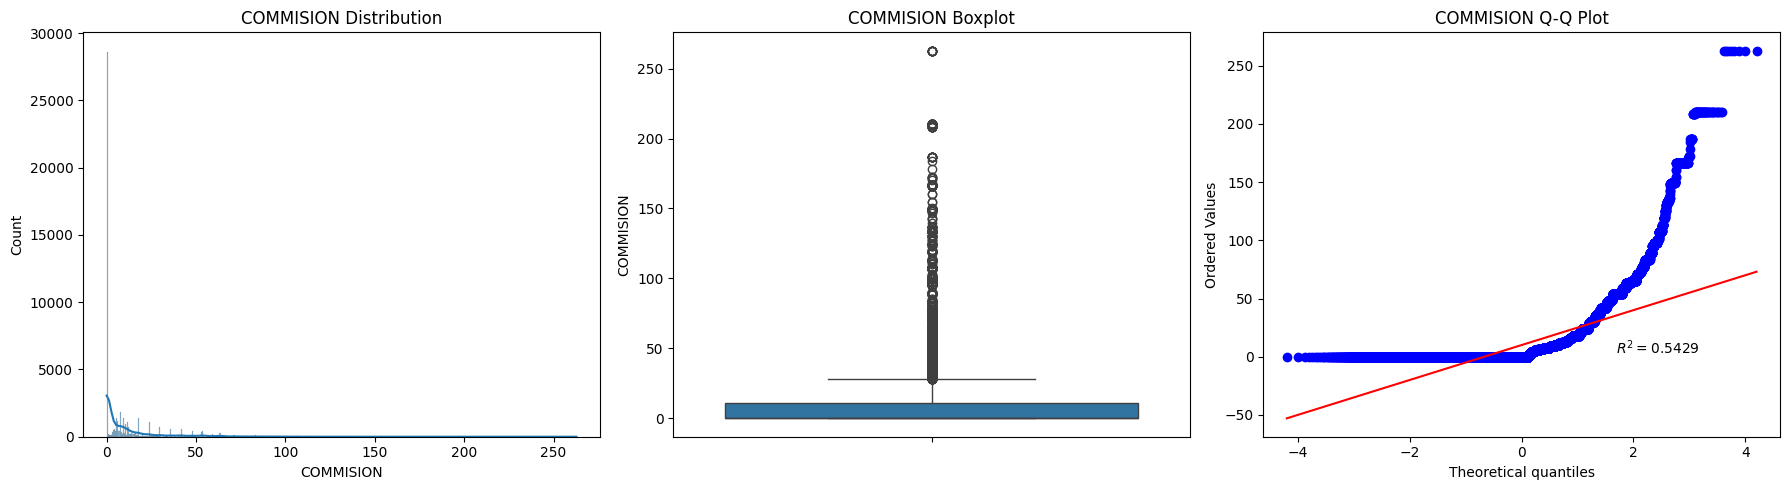


--- AGE ---
Basic Statistics:
count   52142.000
mean       39.061
std        10.540
min         1.000
25%        34.000
50%        36.000
75%        44.000
max        88.000
Name: AGE, dtype: float64
Shapiro-Wilk Test for AGE: p-value = 0.0000, Result = not normally distributed


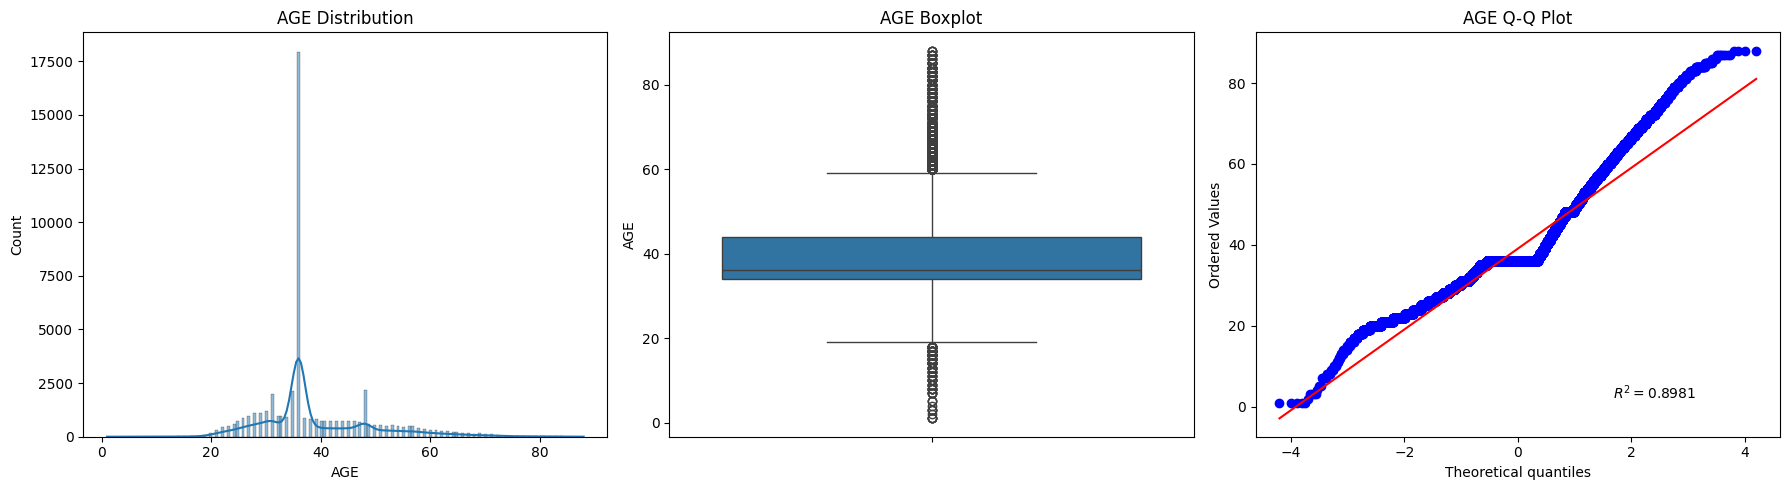

In [9]:
eda.numeric_analysis(df, num_var_names)


--- Correlation Analysis ---


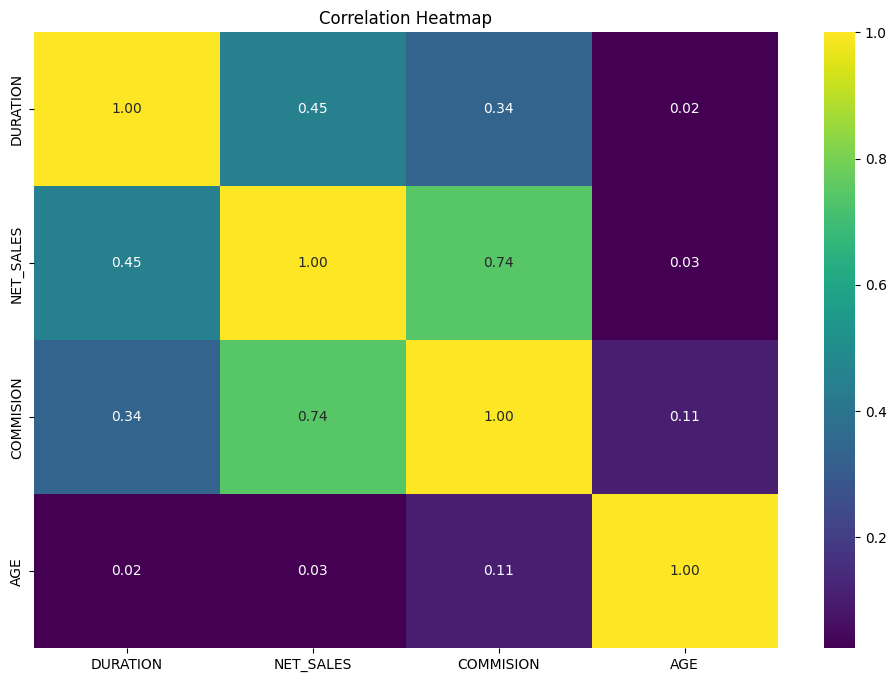

In [10]:
eda.correlation_analysis(df, num_var_names)

In [11]:
#Categorize the commission variable
df['COMMISION'] = df['COMMISION'].astype(object)
df = prep.categorize_commission(df)

In [12]:
#Variable Assignment
X_df, y_df, cat_var_df, num_var_df, cat_var_names, num_var_names = data_clean.assign_features(df, Y_NAME)
print(cat_var_df.columns)

Index(['AGENCY', 'AGENCY_TYPE', 'DISTRIBUTION_CHANNEL', 'PRODUCT_NAME',
       'DESTINATION', 'COMMISION', 'GENDER'],
      dtype='object')


### 4.2 Categorical Data Analysis

- Frequency Table with Percentaje of Participation
- Bar Plot top 20
- Pie Chart top 5


--- Categorical Analysis ---

--- AGENCY - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
   Category  Frequency  Percentage  Cumulative Percentage
0       EPX      28237      54.154                 54.154
1       C2B       7597      14.570                 68.724
2       CWT       6751      12.947                 81.671
3       JZI       5822      11.166                 92.837
4       SSI        926       1.776                 94.613
5       LWC        655       1.256                 95.869
6       RAB        610       1.170                 97.039
7       TST        490       0.940                 97.979
8       KML        331       0.635                 98.613
9       ART        255       0.489                 99.102
10      CCR        140       0.268                 99.371
11      CBH         94       0.180                 99.551
12      TTW         94       0.180                 99.732
13      CSR         86       0.165                 99.896
14    

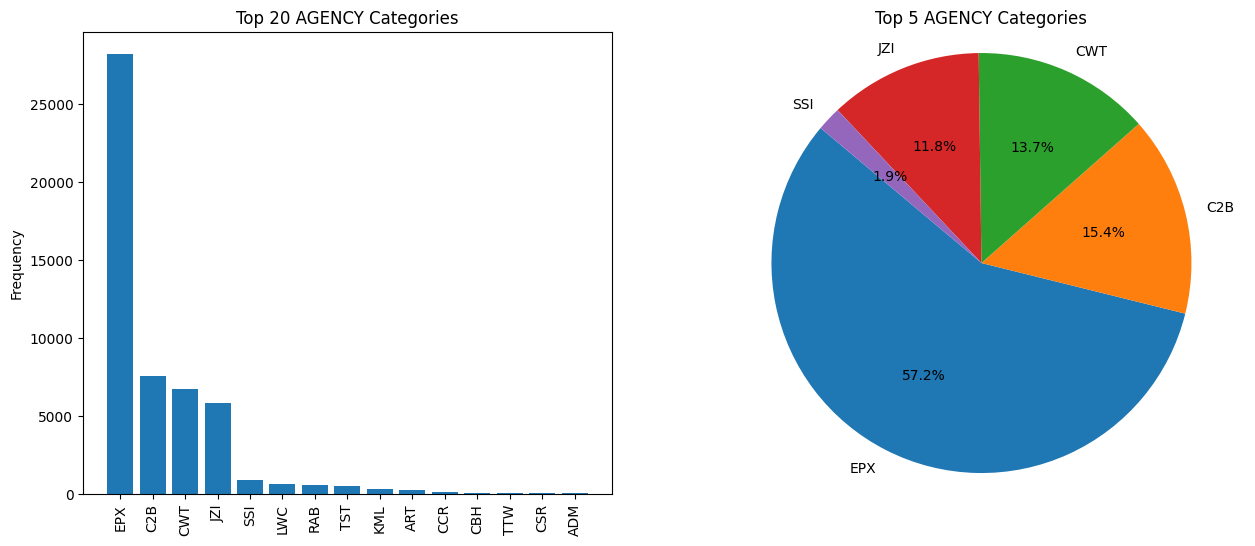


--- AGENCY_TYPE - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
        Category  Frequency  Percentage  Cumulative Percentage
0  Travel Agency      36932      70.830                 70.830
1       Airlines      15210      29.170                100.000


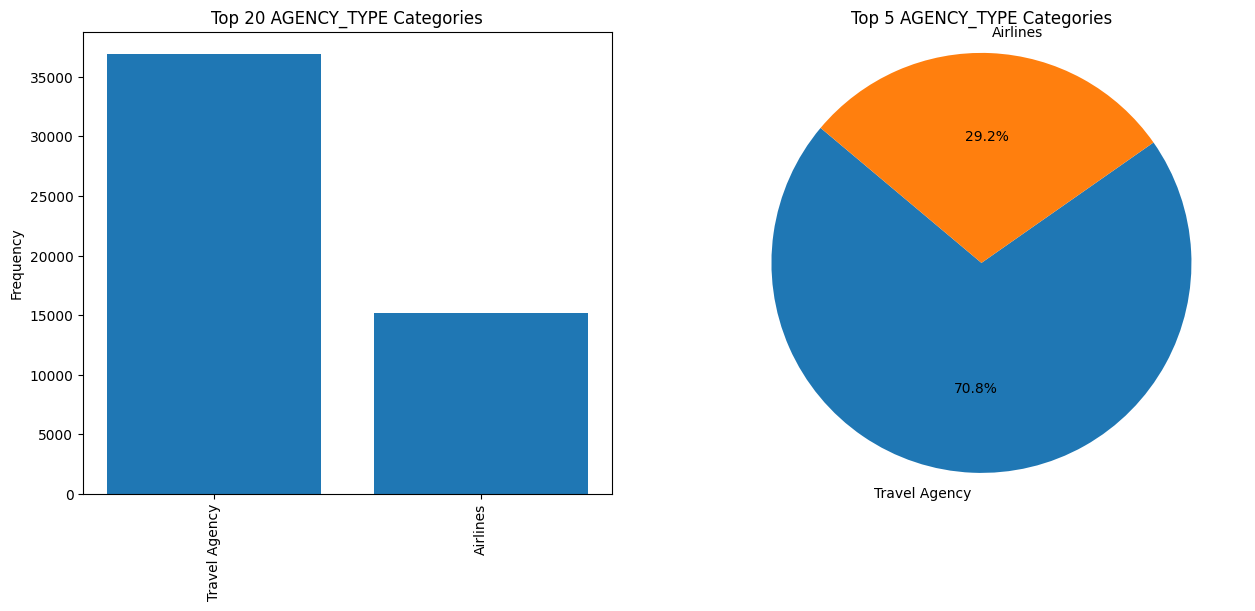


--- DISTRIBUTION_CHANNEL - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
  Category  Frequency  Percentage  Cumulative Percentage
0   Online      51197      98.188                 98.188
1  Offline        945       1.812                100.000


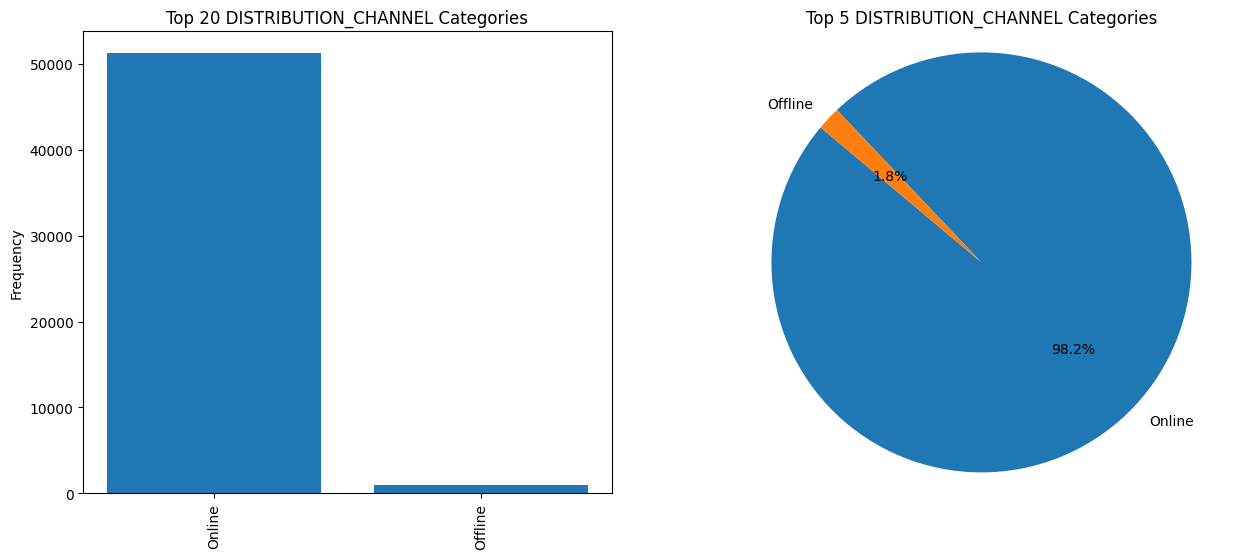


--- PRODUCT_NAME - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
                             Category  Frequency  Percentage  \
0                   Cancellation Plan      14927      28.628   
1            2 way Comprehensive Plan      10869      20.845   
2     Rental Vehicle Excess Insurance       6751      12.947   
3                          Basic Plan       5018       9.624   
4                         Bronze Plan       3706       7.108   
5            1 way Comprehensive Plan       2441       4.681   
6                         Silver Plan       2137       4.098   
7                          Value Plan       1680       3.222   
8                  Annual Silver Plan       1241       2.380   
9                    Ticket Protector        926       1.776   
10              Travel Cruise Protect        490       0.940   
11                          Gold Plan        335       0.642   
12                 Comprehensive Plan        305       0.585   
13  

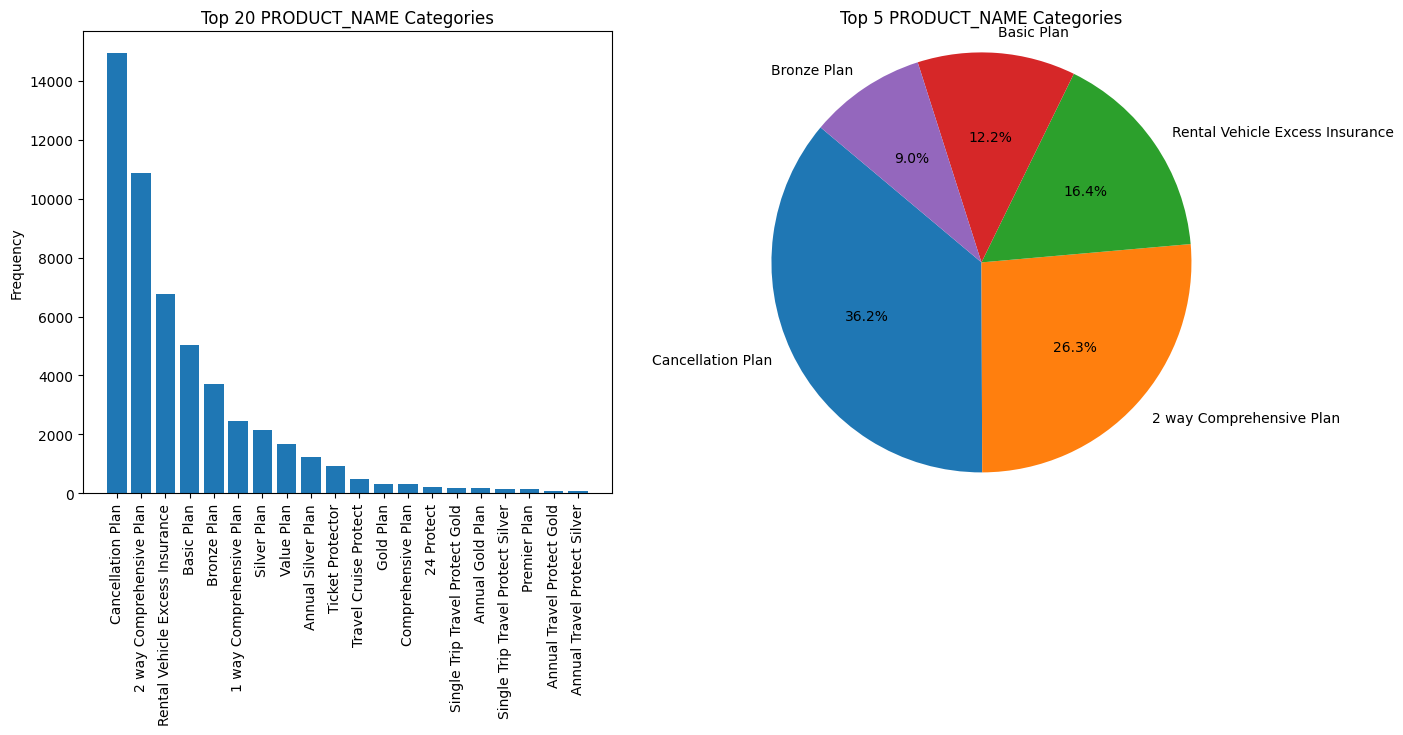


--- DESTINATION - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
                     Category  Frequency  Percentage  Cumulative Percentage
0                   SINGAPORE      11236      21.549                 21.549
1                    THAILAND       4940       9.474                 31.023
2                    MALAYSIA       4090       7.844                 38.867
3                       CHINA       3853       7.389                 46.256
4                   AUSTRALIA       3082       5.911                 52.167
5                   INDONESIA       2802       5.374                 57.541
6               UNITED STATES       2351       4.509                 62.050
7                   HONG KONG       2049       3.930                 65.979
8                 PHILIPPINES       1956       3.751                 69.731
9                       JAPAN       1835       3.519                 73.250
10         KOREA, REPUBLIC OF       1351       2.591             

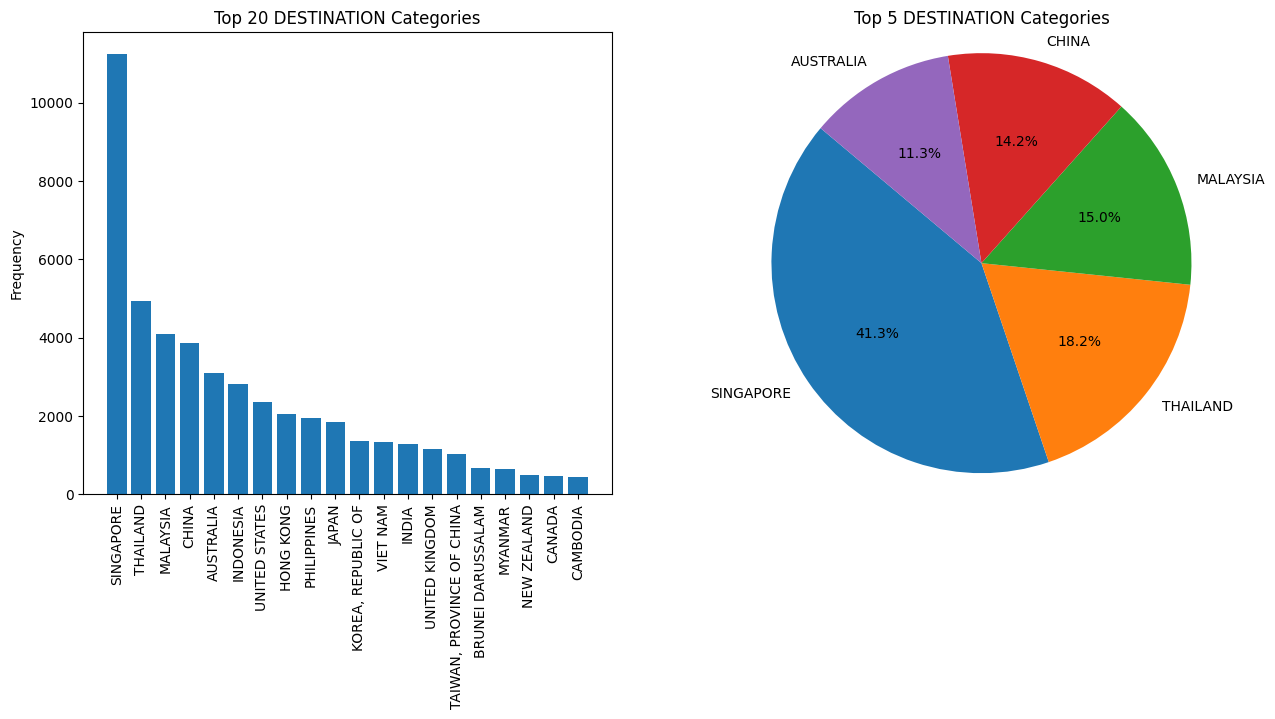


--- COMMISION - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
  Category  Frequency  Percentage  Cumulative Percentage
0      Low      51567      98.897                 98.897
1   Medium        506       0.970                 99.868
2     High         69       0.132                100.000


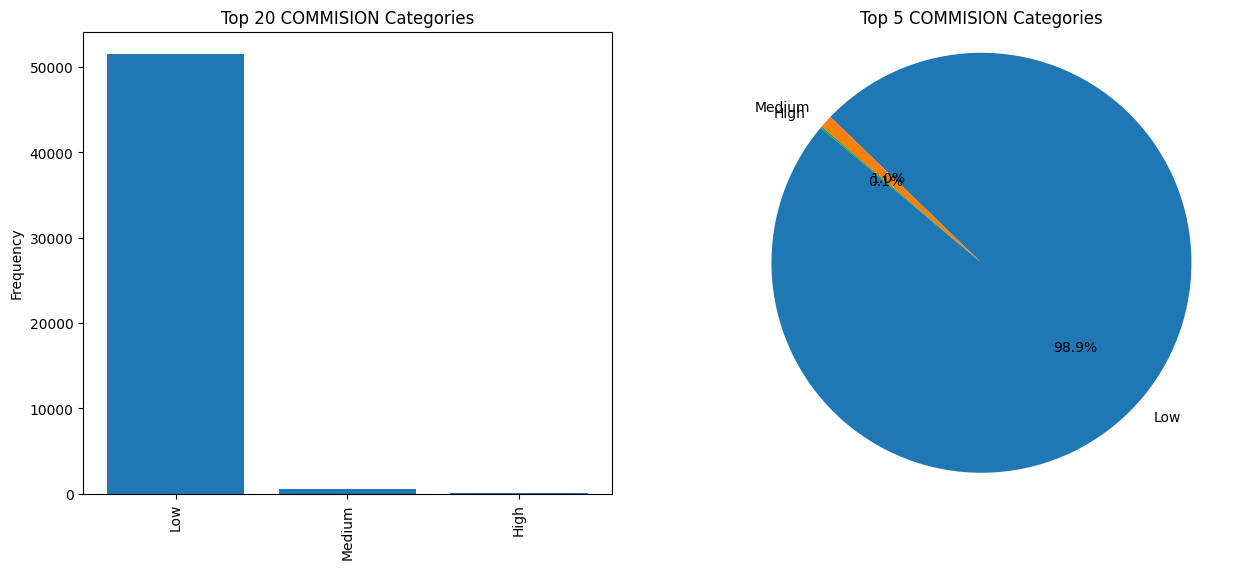


--- GENDER - Top Categories ---
Frequency:

Top Categories with Percentage of Participation:
  Category  Frequency  Percentage  Cumulative Percentage
0        M      44167      84.705                 84.705
1        F       7975      15.295                100.000


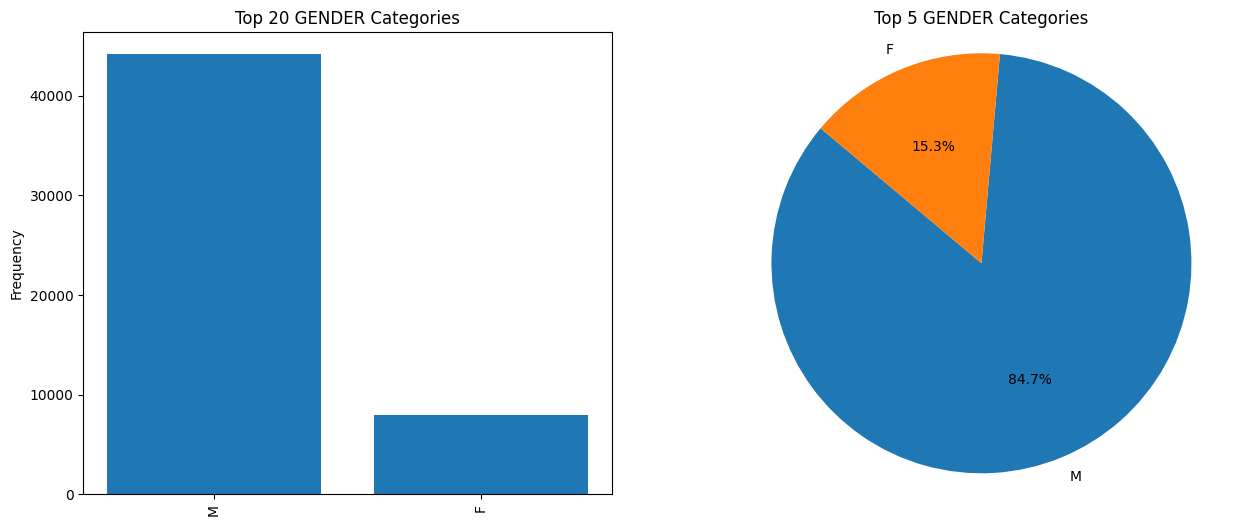


Features Frequency Table:
                 Feature Frequency
0                AGENCY        15
1           AGENCY_TYPE         2
2  DISTRIBUTION_CHANNEL         2
3          PRODUCT_NAME        25
4           DESTINATION       146
5             COMMISION         3
6                GENDER         2


In [13]:
eda.categorical_analysis(df, cat_var_names)

### 4.2 Bivariate Analysis

- Target Relationship (cat-num vs y_name)
- Distribution Histogram by target
- Categorycal vs Numerical Variable
- Plot bar Categorycal by target


--- Target Relationship ---

--- AGENCY vs CLAIM ---
Chi-square Test for AGENCY vs CLAIM:
Chi-square Statistic: 1617.983113611612
P-Value: 0.0
There is a significant relationship between the variables.

--- AGENCY_TYPE vs CLAIM ---
Chi-square Test for AGENCY_TYPE vs CLAIM:
Chi-square Statistic: 533.618907943975
P-Value: 4.6093616989976915e-118
There is a significant relationship between the variables.

--- DISTRIBUTION_CHANNEL vs CLAIM ---
Chi-square Test for DISTRIBUTION_CHANNEL vs CLAIM:
Chi-square Statistic: 0.9858311798454413
P-Value: 0.32076340951924964
There is no significant relationship between the variables.

--- PRODUCT_NAME vs CLAIM ---
Chi-square Test for PRODUCT_NAME vs CLAIM:
Chi-square Statistic: 1946.428480926716
P-Value: 0.0
There is a significant relationship between the variables.

--- DESTINATION vs CLAIM ---
Chi-square Test for DESTINATION vs CLAIM:
Chi-square Statistic: 939.7360451155338
P-Value: 1.581641212220746e-116
There is a significant relationship between 

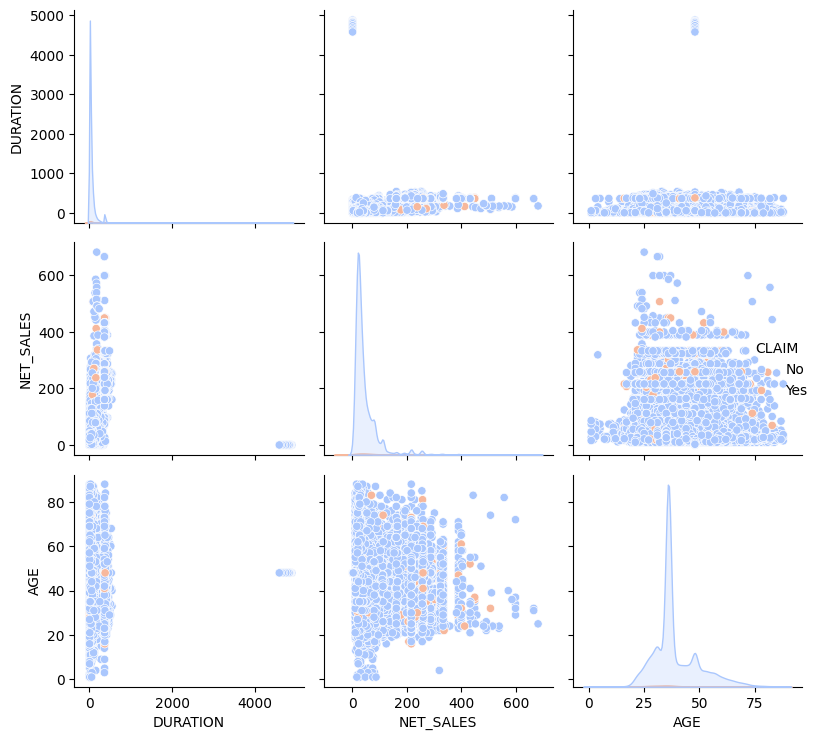

In [14]:
eda.target_relationship(df, cat_var_names, num_var_names, num_var_df, y_df, Y_NAME)

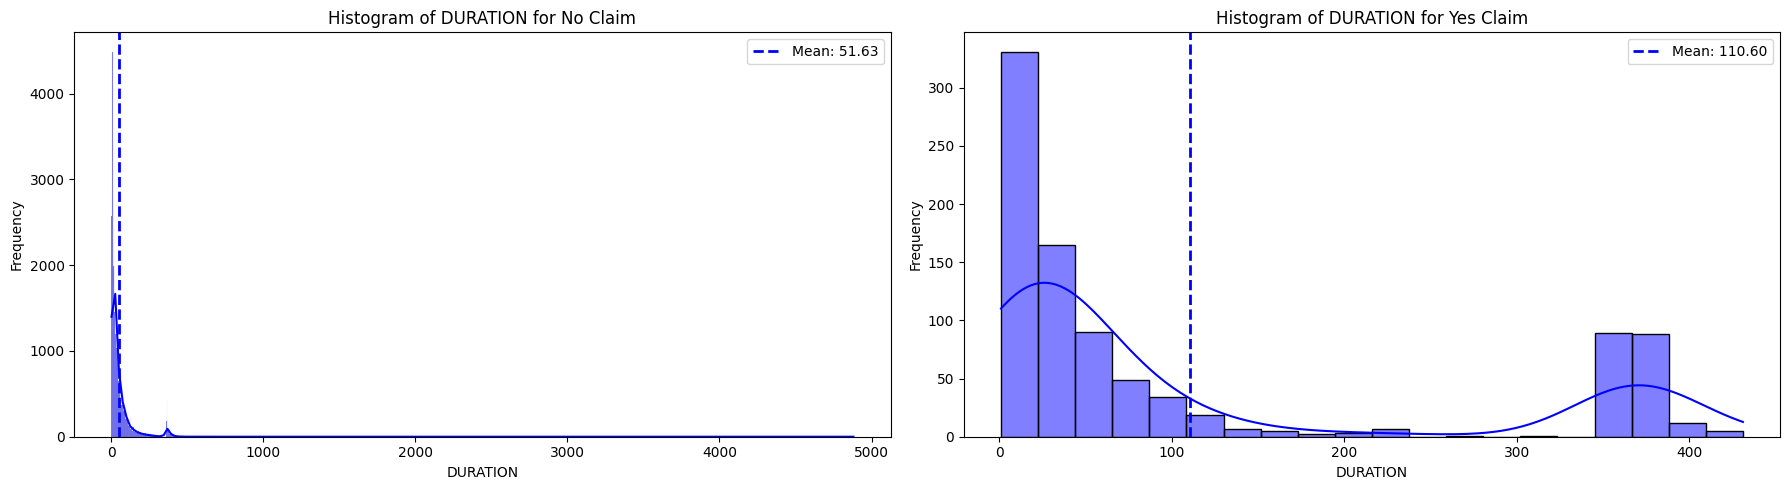

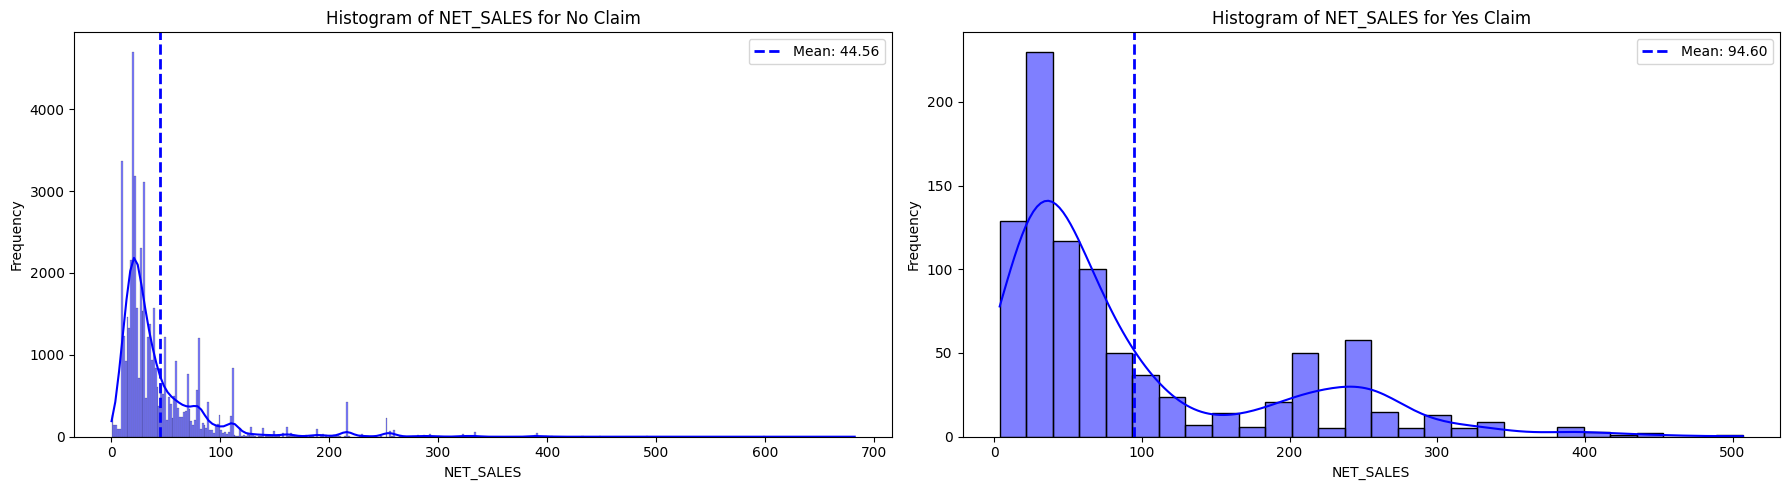

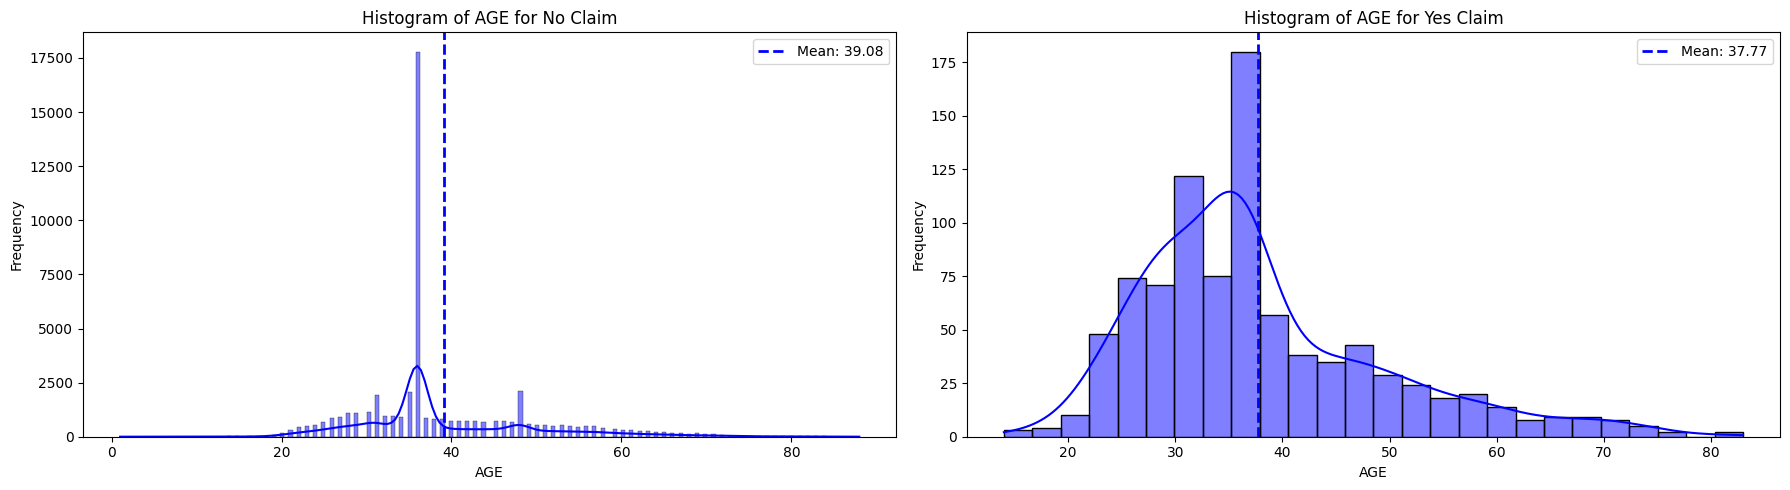

In [15]:
for num_var_name in num_var_names:
    eda.plot_histograms_seaborn(df, num_var_name, Y_NAME)

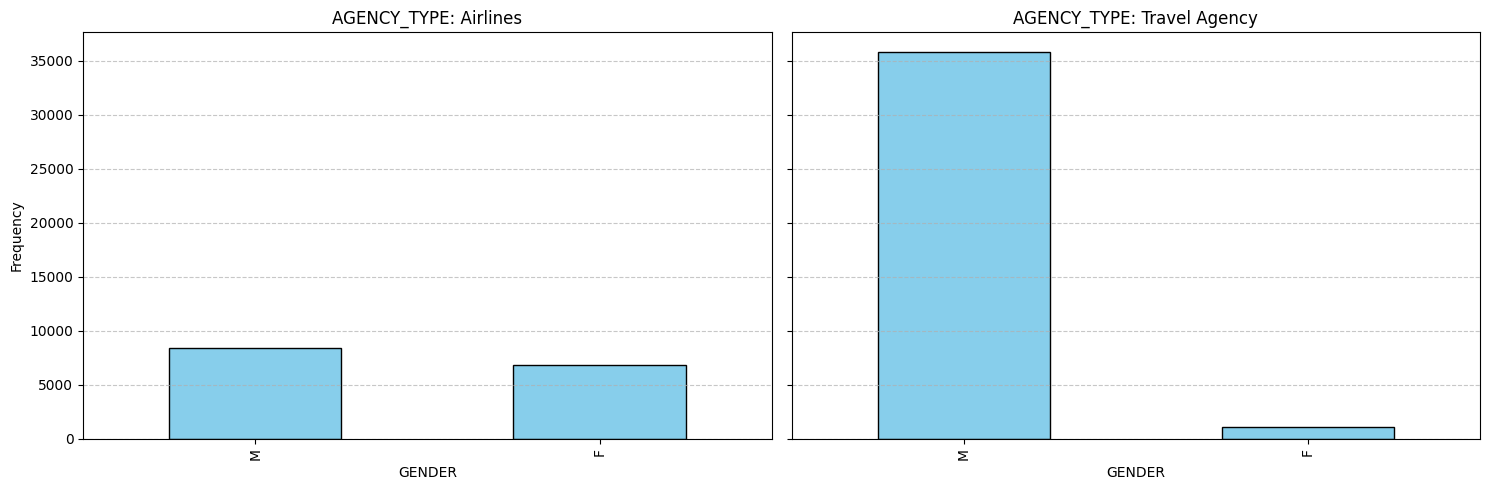

In [16]:
eda.plot_categorical_comparison(df, 'AGENCY_TYPE', 'GENDER')


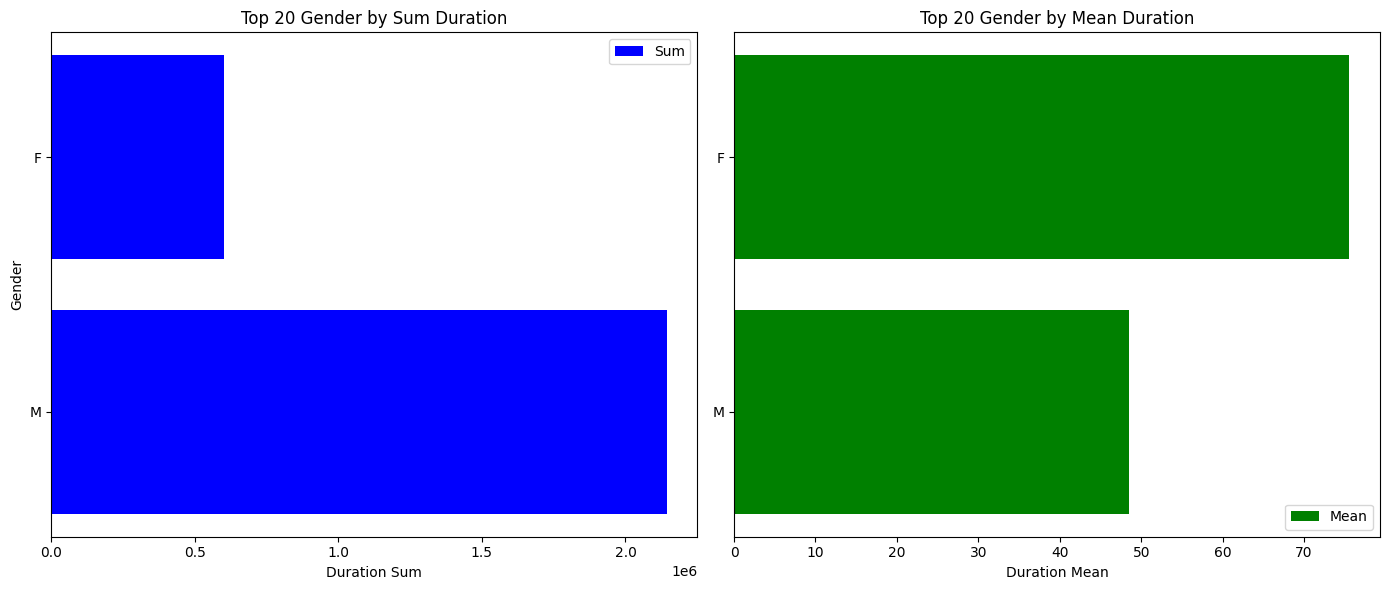

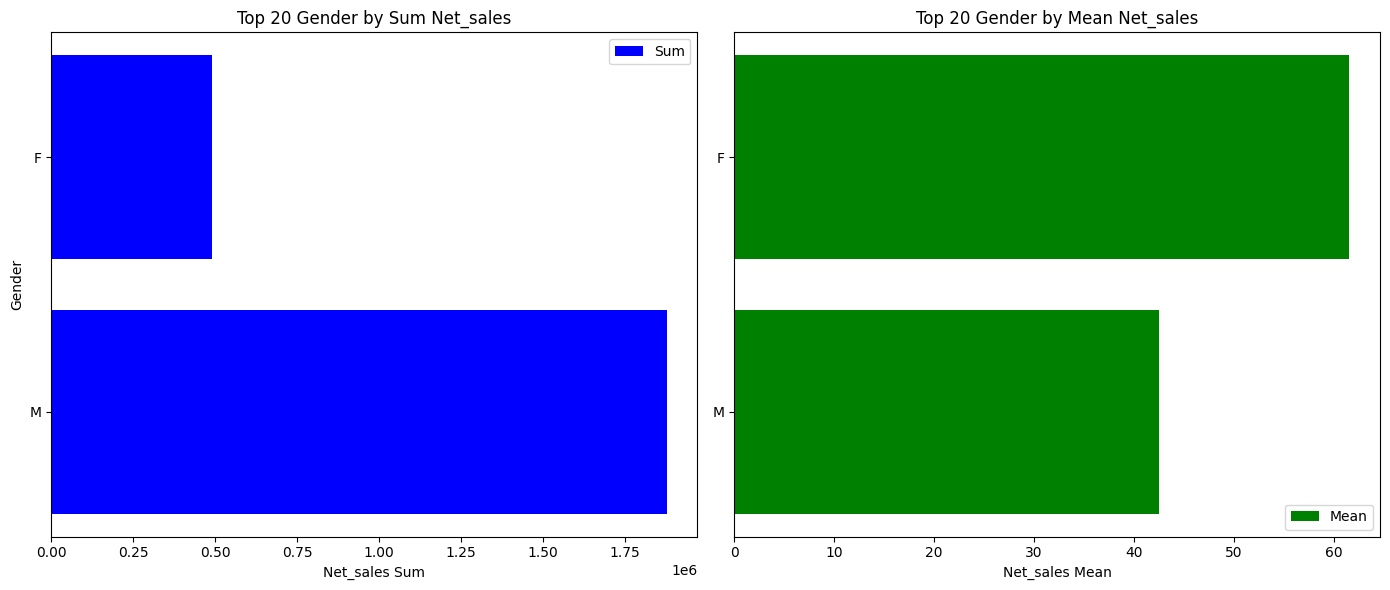

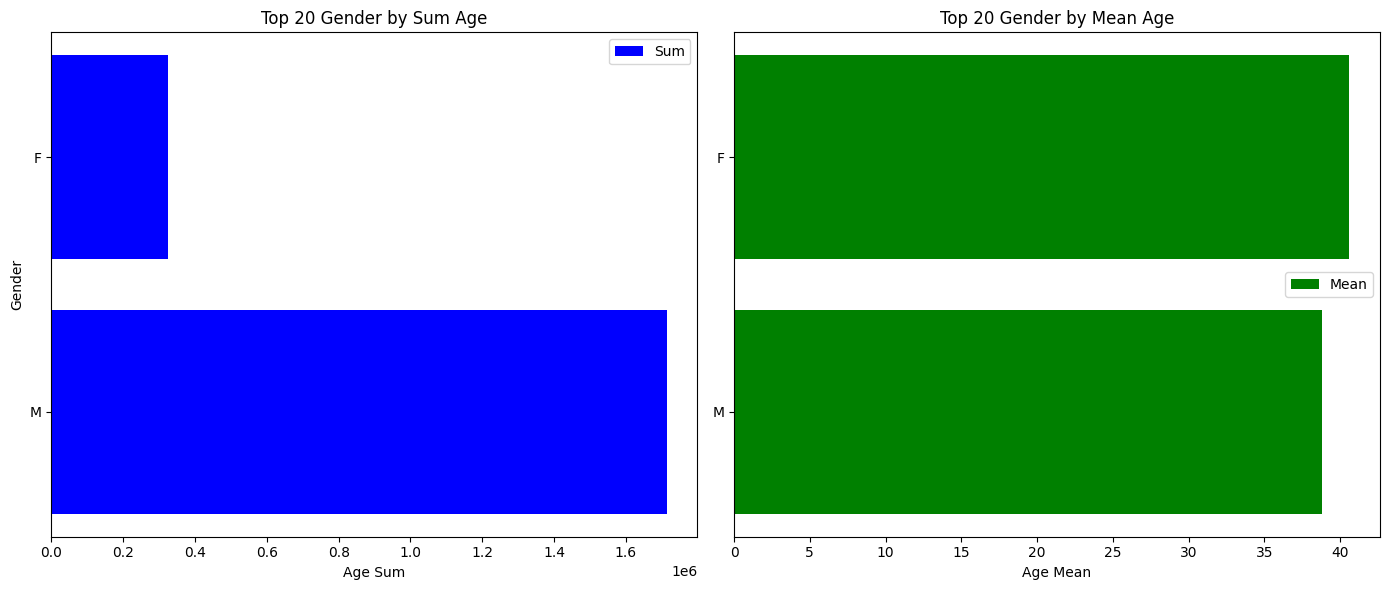

In [17]:
for num_var_name in num_var_names:
    eda.plot_horizontal_bar(df,'GENDER',num_var_name, 20)

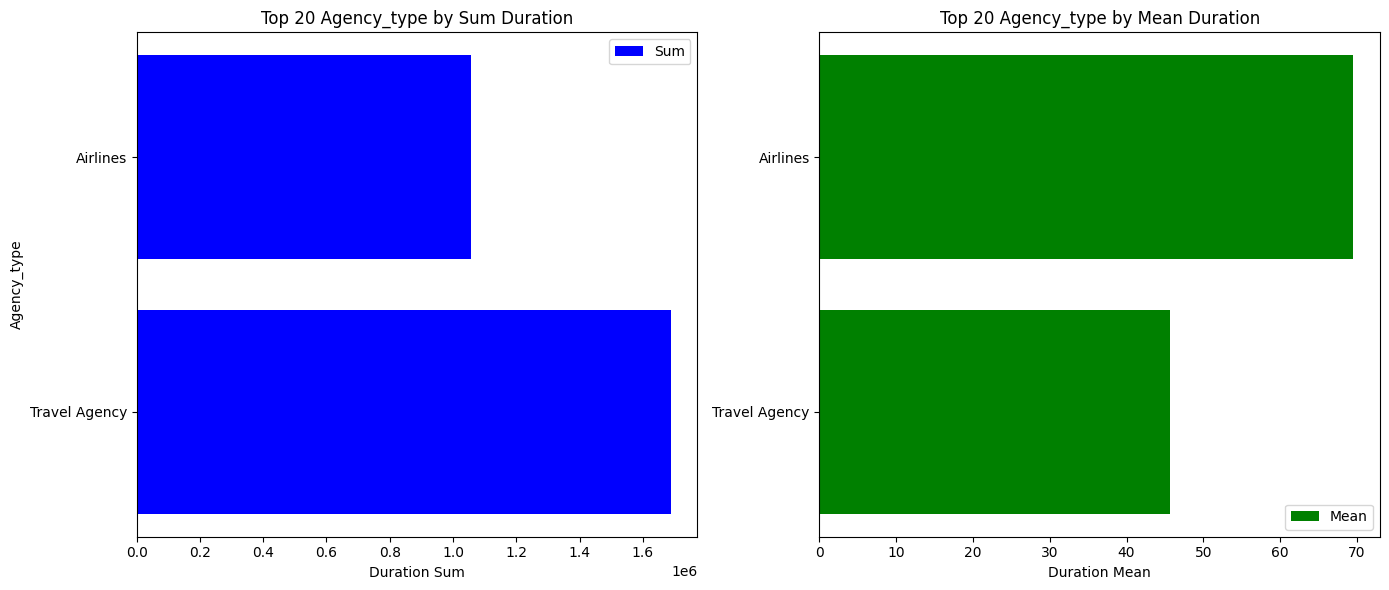

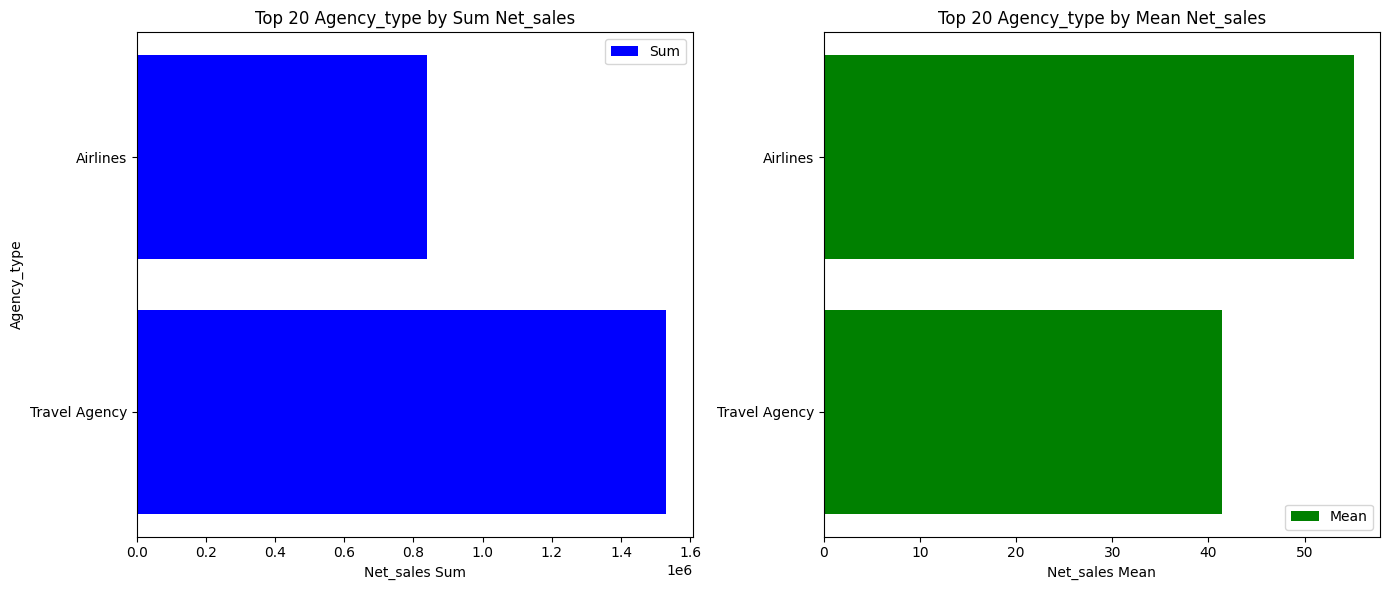

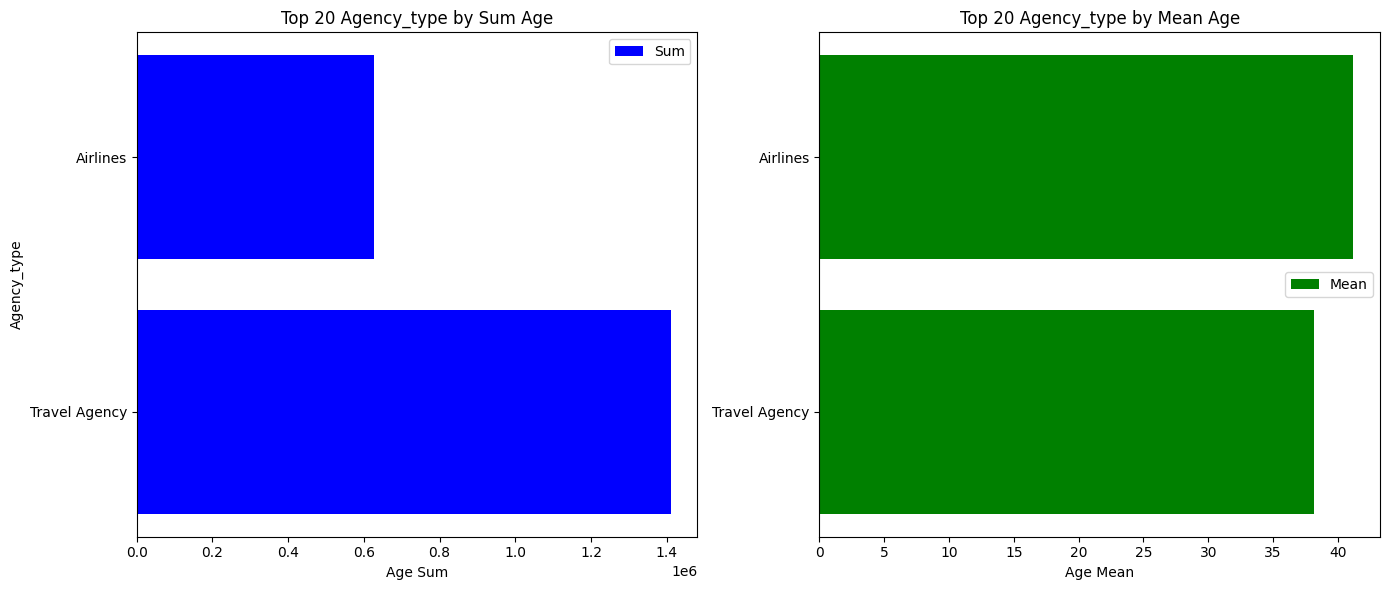

In [18]:
for num_var_name in num_var_names:
    eda.plot_horizontal_bar(df,'AGENCY_TYPE',num_var_name, 20)

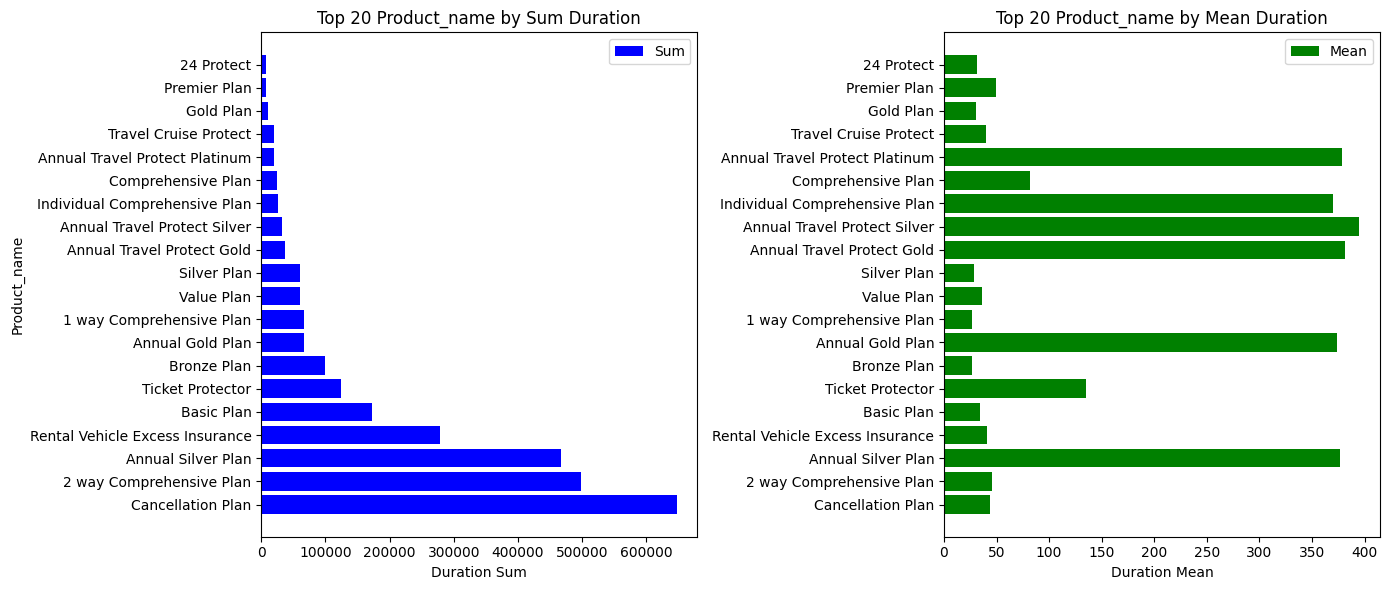

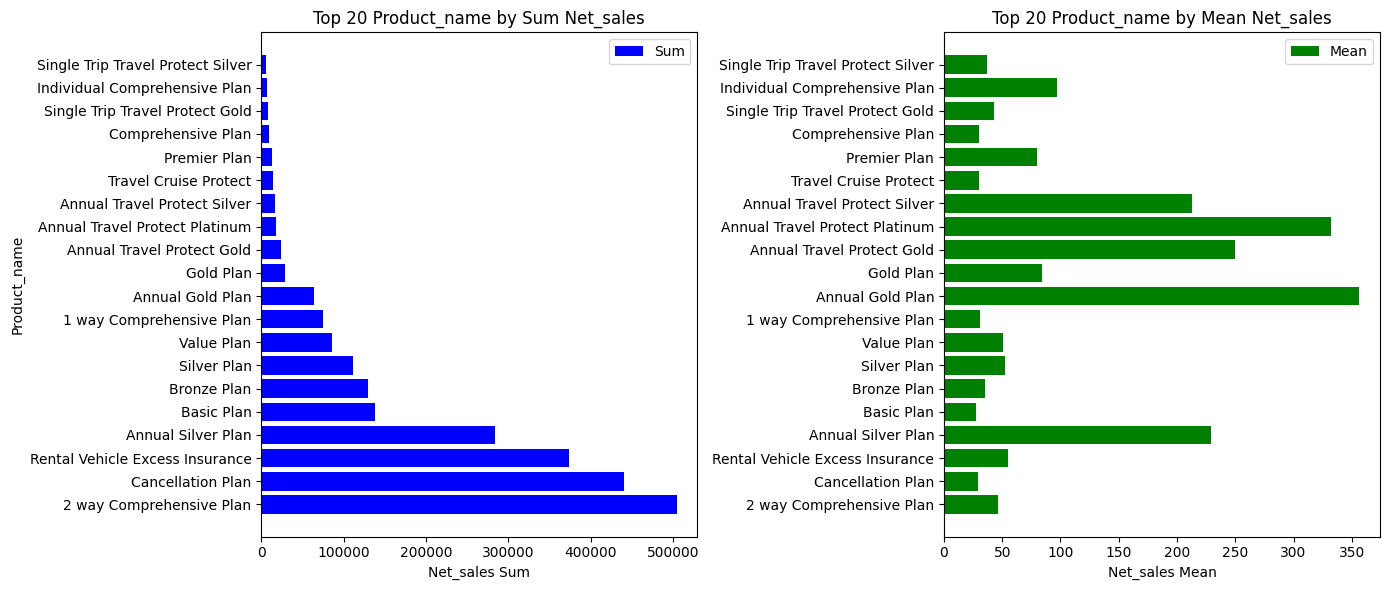

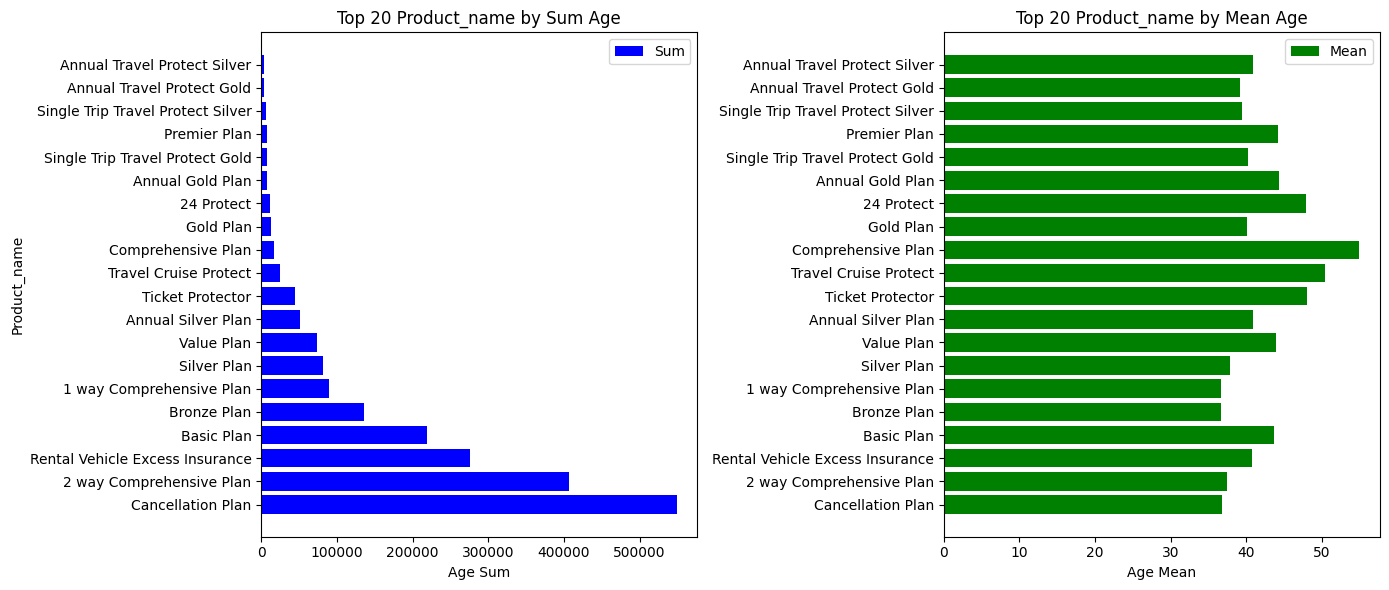

In [19]:
for num_var_name in num_var_names:
    eda.plot_horizontal_bar(df,'PRODUCT_NAME',num_var_name, 20)

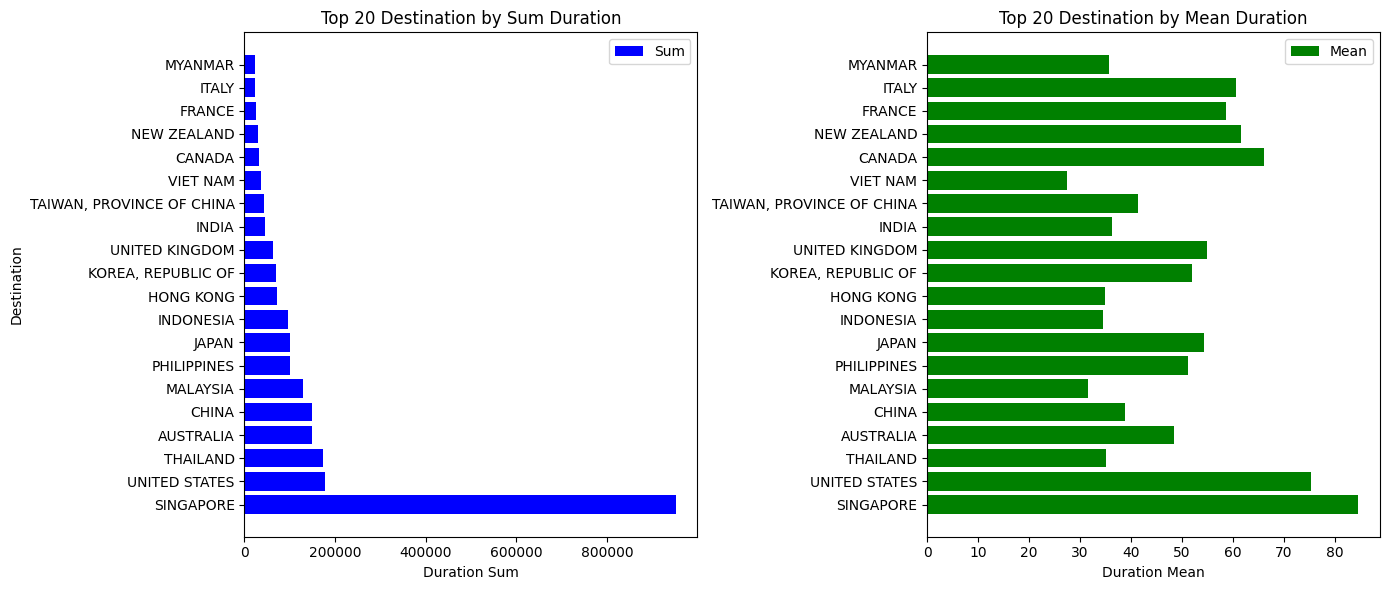

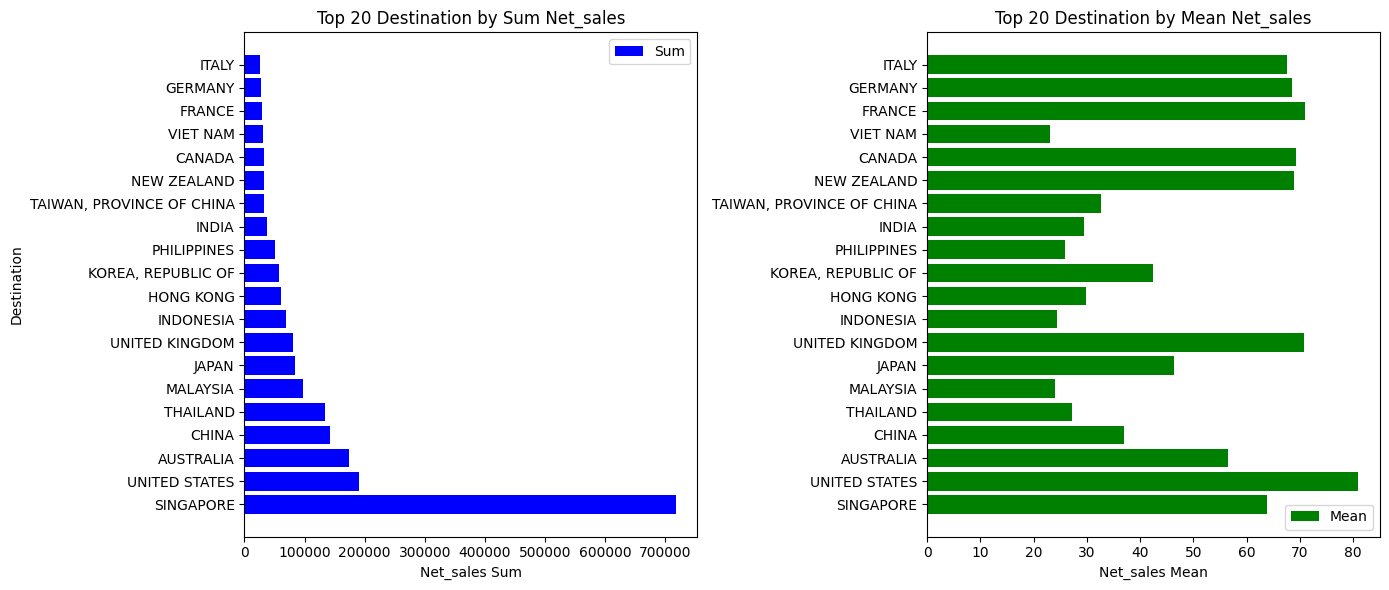

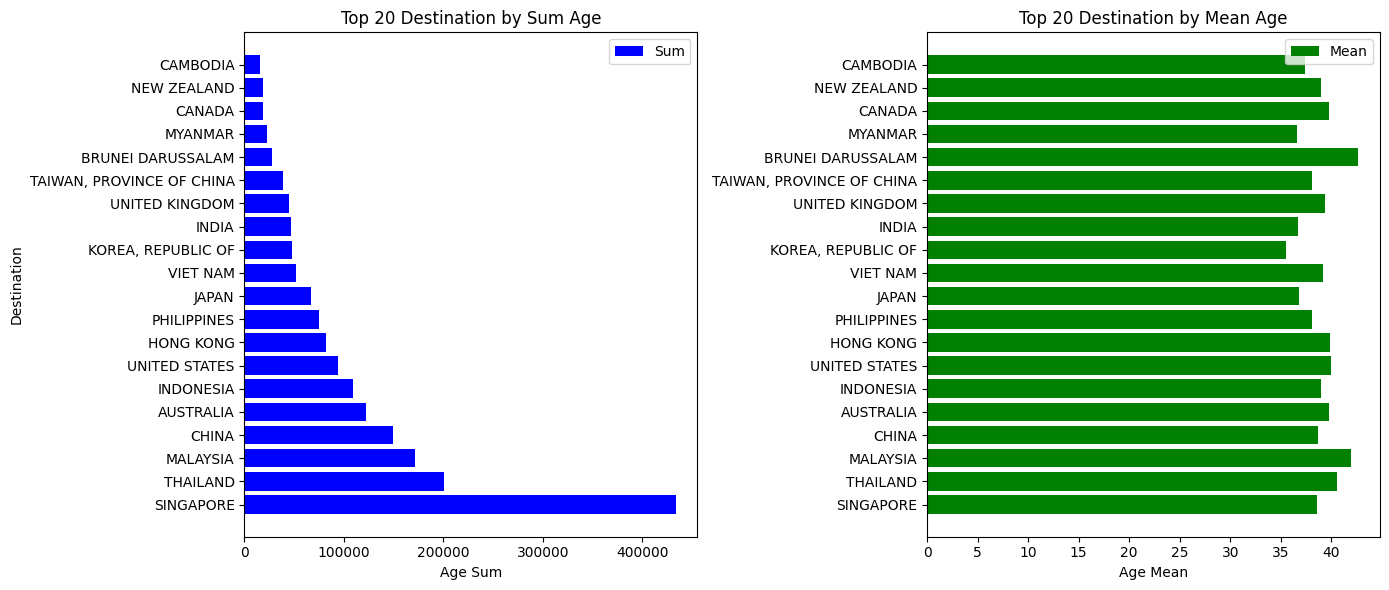

In [20]:
for num_var_name in num_var_names:
    eda.plot_horizontal_bar(df,'DESTINATION',num_var_name, 20)

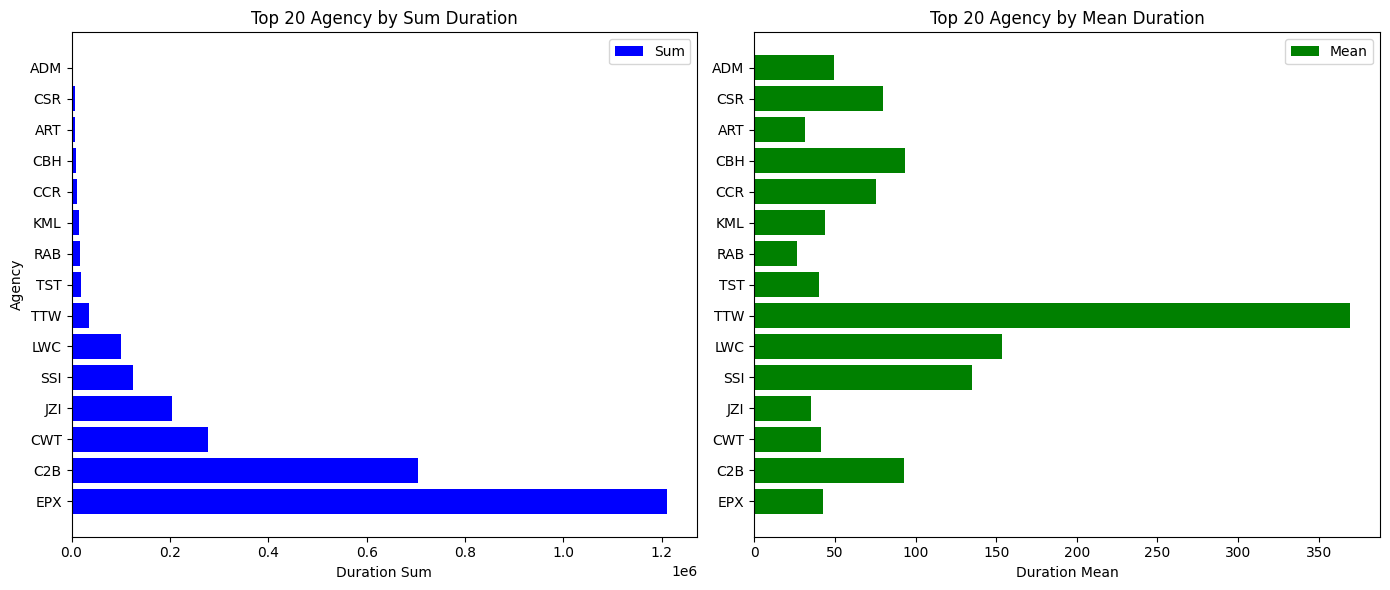

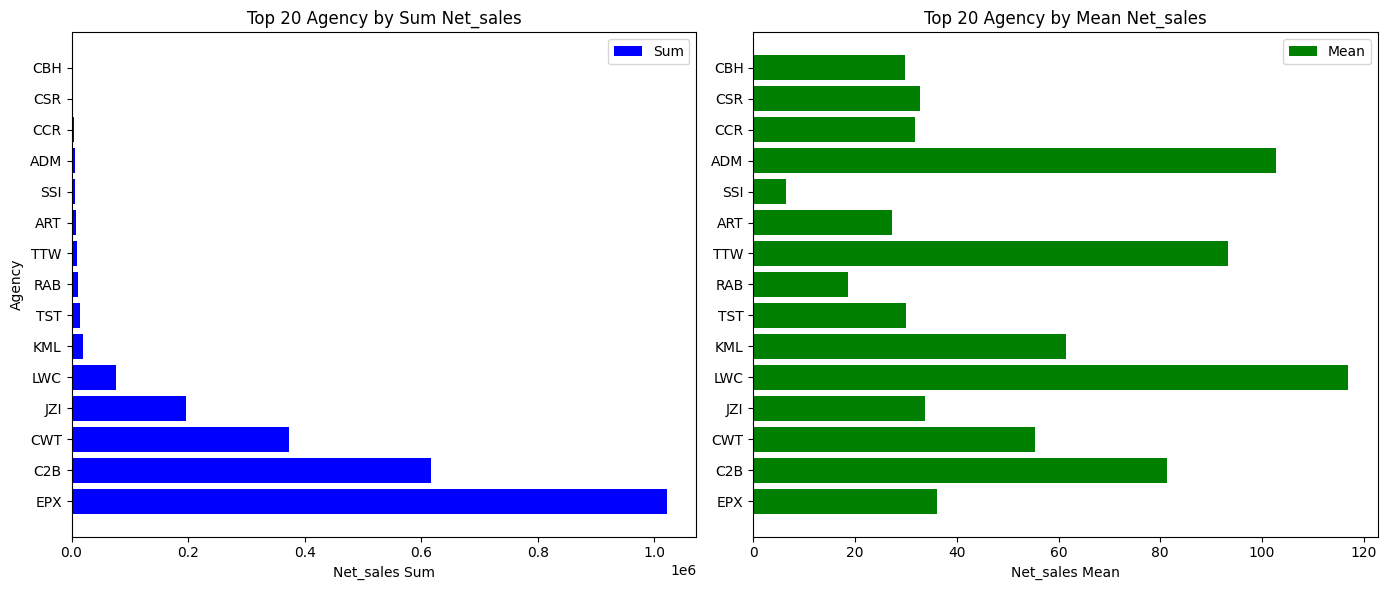

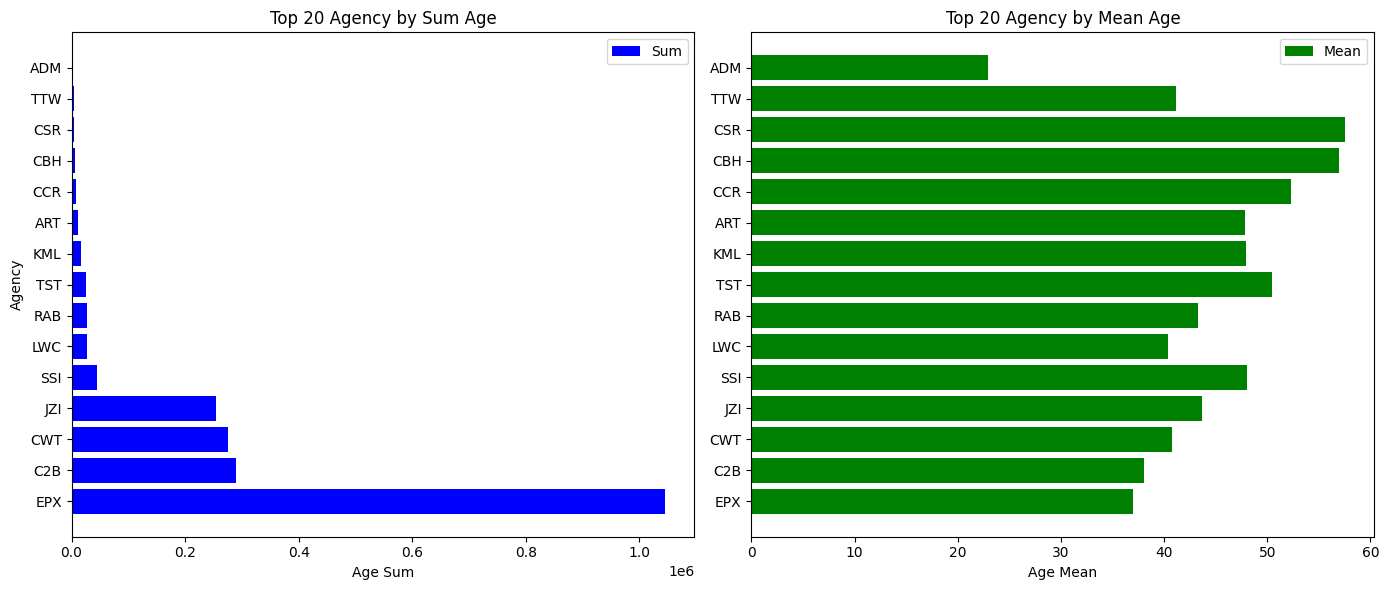

In [21]:
for num_var_name in num_var_names:
    eda.plot_horizontal_bar(df,'AGENCY',num_var_name, 20)

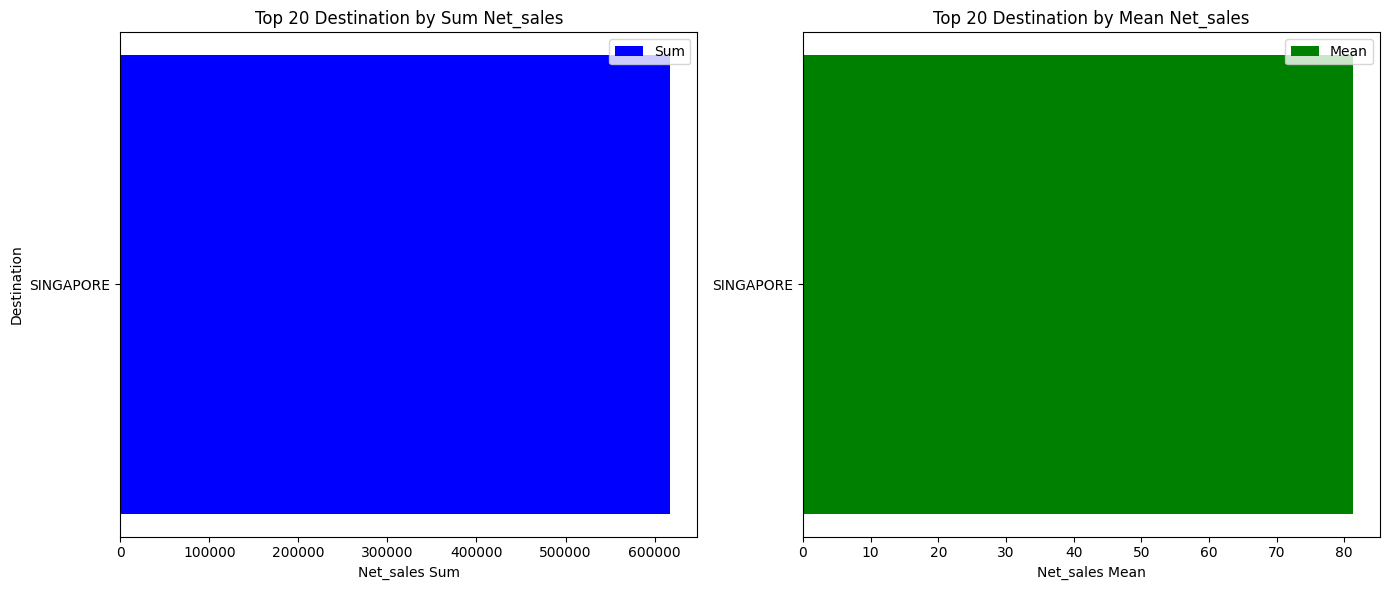

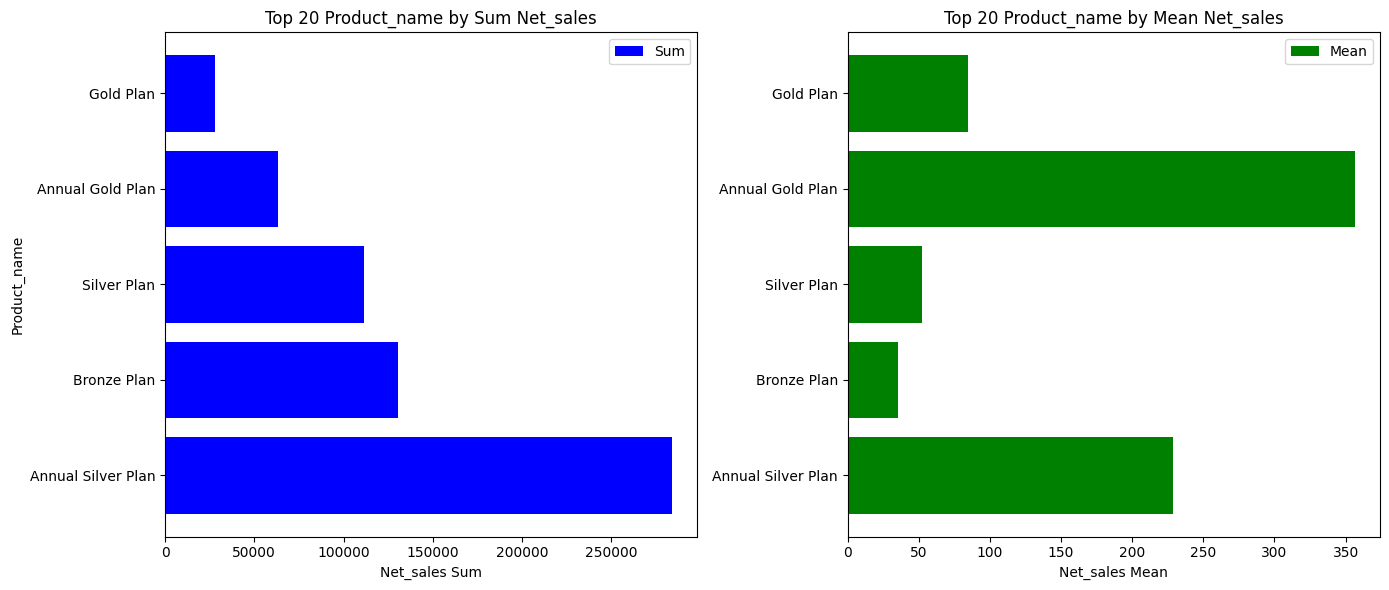

In [22]:
df_C2B = df[df['AGENCY'] == 'C2B']
eda.plot_horizontal_bar(df_C2B,'DESTINATION','NET_SALES', 20)
eda.plot_horizontal_bar(df_C2B,'PRODUCT_NAME','NET_SALES', 20)

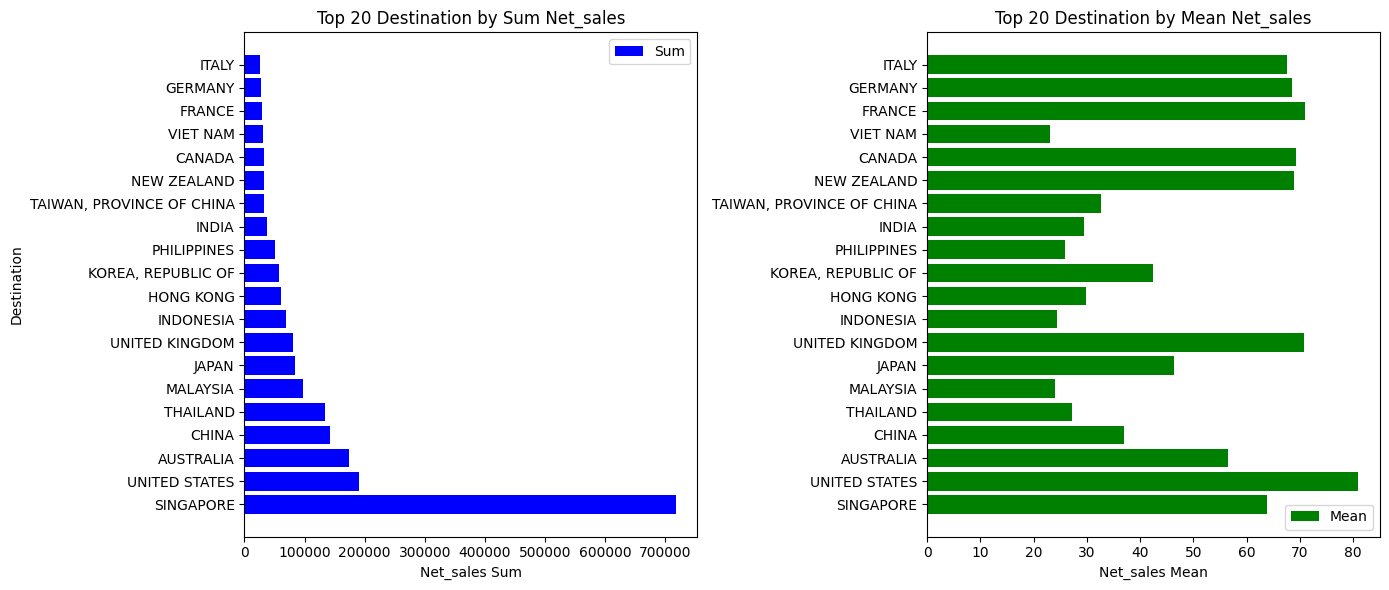

In [23]:
eda.plot_horizontal_bar(df,'DESTINATION','NET_SALES', 20)

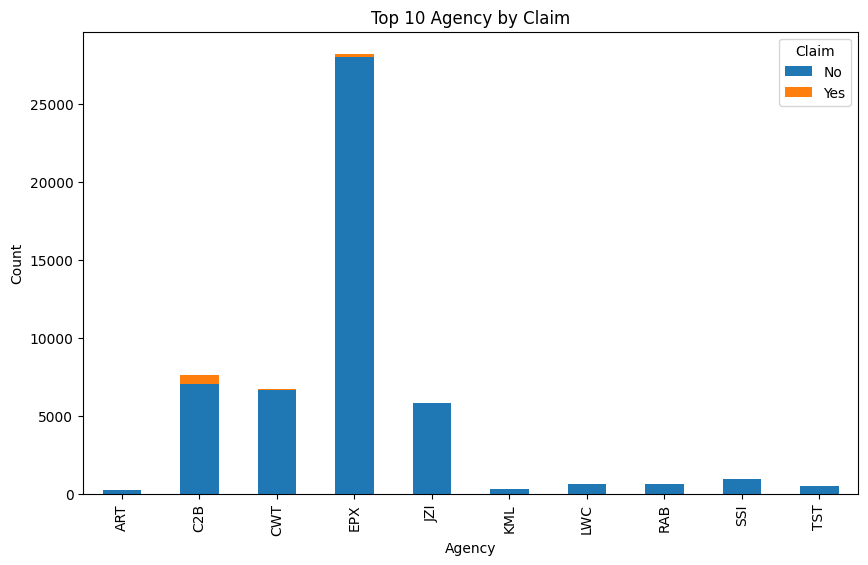

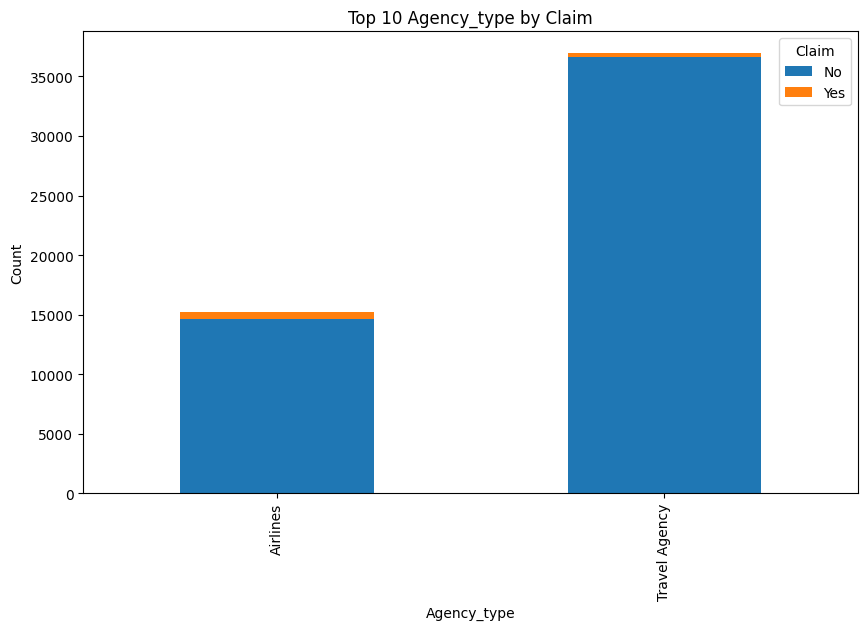

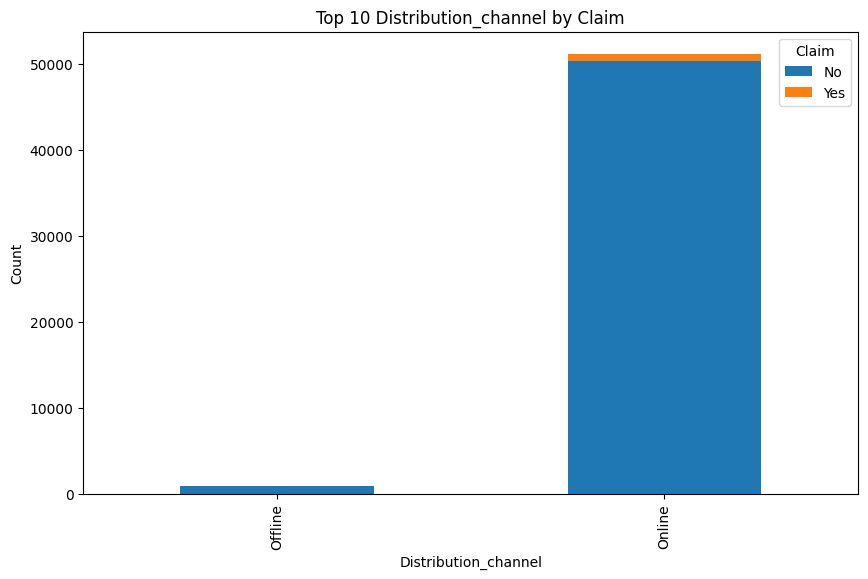

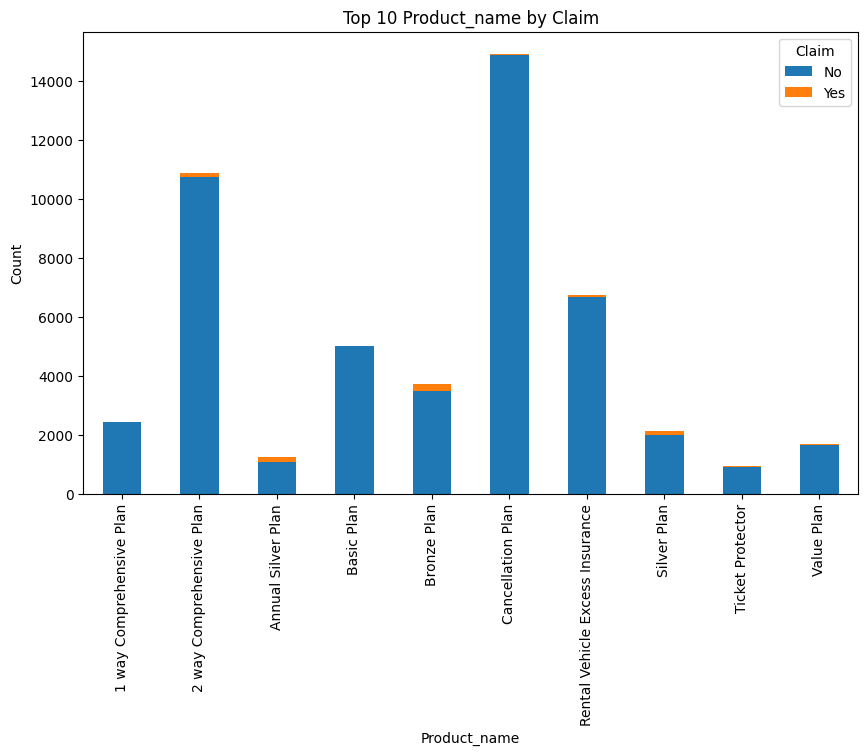

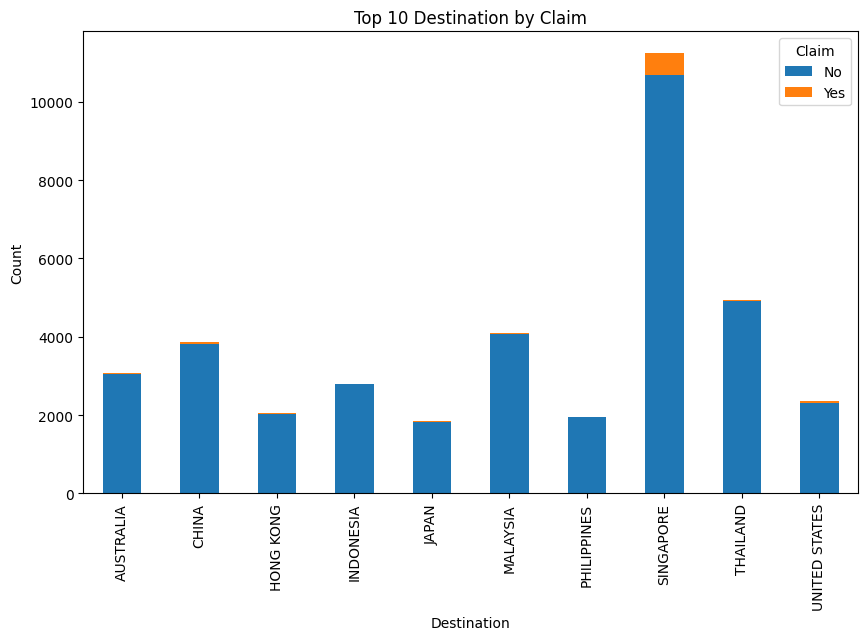

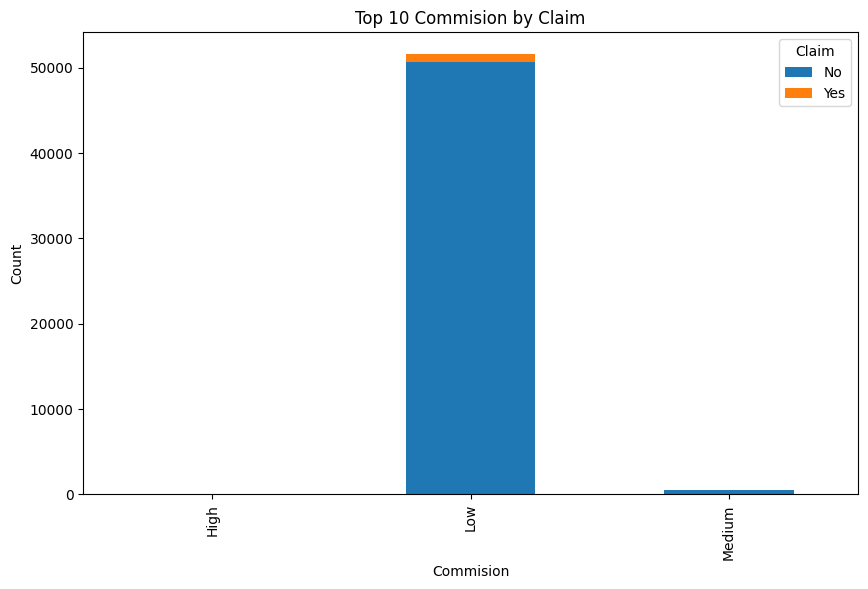

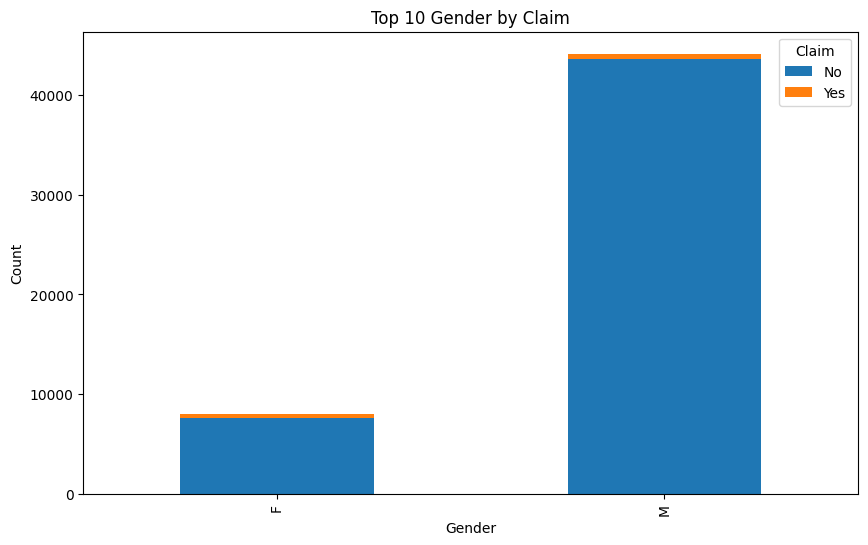

In [24]:
for cat in cat_var_names:
    eda.plot_bar_target_variable(df, Y_NAME, cat, 10)

## 5. Preprocessing

### 5.1 Variable Transformation

In [25]:
num_var_df

DURATION  NET_SALES  AGE
21           12     46.150   44
22            7     17.550   25
23           12     94.000   34
24          190    294.750   26
25          364    389.000   30
...         ...        ...  ...
63320         5     18.000   27
63321       111     35.000   31
63322        58     40.000   40
63323         2     18.000   57
63325        22     26.000   35

[52142 rows x 3 columns]

In [26]:
num_var_df=prep.num_var_df_transform(num_var_df, num_var_names)
df = pd.concat([y_df, num_var_df, cat_var_df], axis=1)
num_var_df

DURATION  NET_SALES    AGE
21       -0.613      0.475  0.585
22       -1.073     -0.753 -1.578
23       -0.613      1.333 -0.411
24        1.646      2.616 -1.430
25        2.125      2.909 -0.888
...         ...        ...    ...
63320    -1.354     -0.720 -1.288
63321     1.234      0.130 -0.764
63322     0.715      0.297  0.215
63323    -2.056     -0.720  1.598
63325    -0.094     -0.247 -0.299

[52142 rows x 3 columns]


--- Numeric Analysis ---

--- DURATION ---
Basic Statistics:
count   52142.000
mean       -0.000
std         1.000
min        -2.484
25%        -0.688
50%         0.015
75%         0.701
max         3.822
Name: DURATION, dtype: float64
Shapiro-Wilk Test for DURATION: p-value = 0.0000, Result = not normally distributed


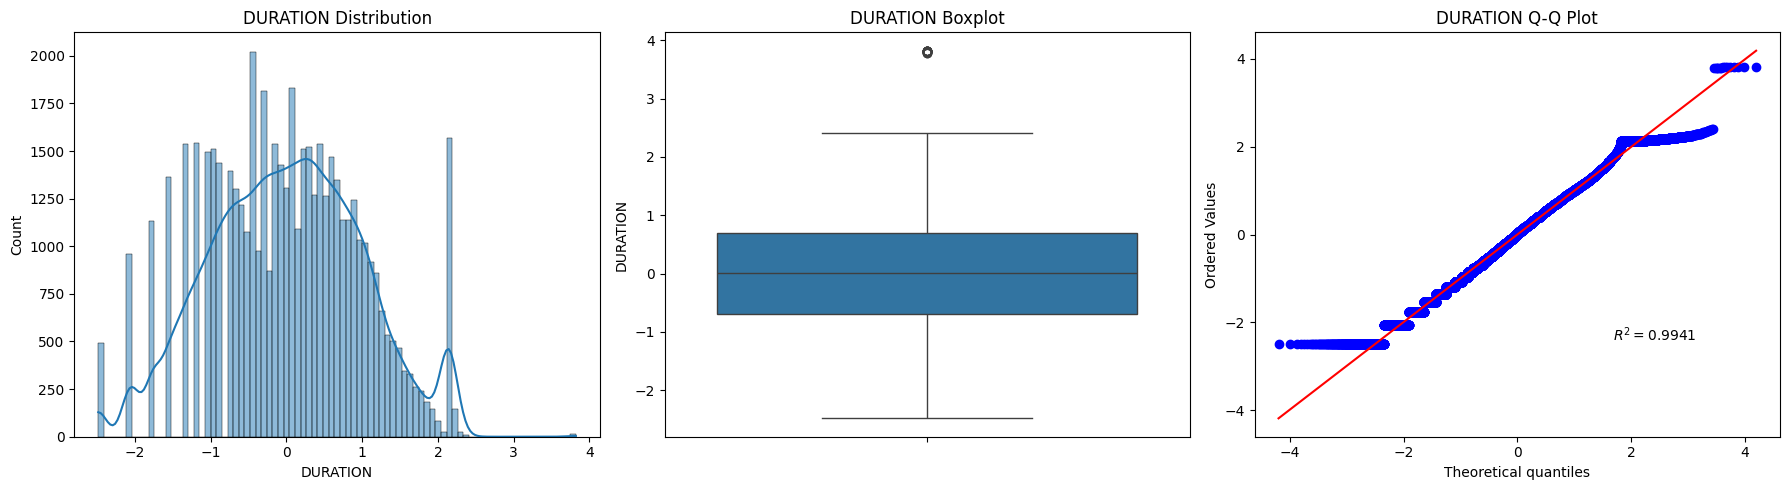


--- NET_SALES ---
Basic Statistics:
count   52142.000
mean       -0.000
std         1.000
min        -5.104
25%        -0.584
50%        -0.077
75%         0.645
max         3.482
Name: NET_SALES, dtype: float64
Shapiro-Wilk Test for NET_SALES: p-value = 0.0000, Result = not normally distributed


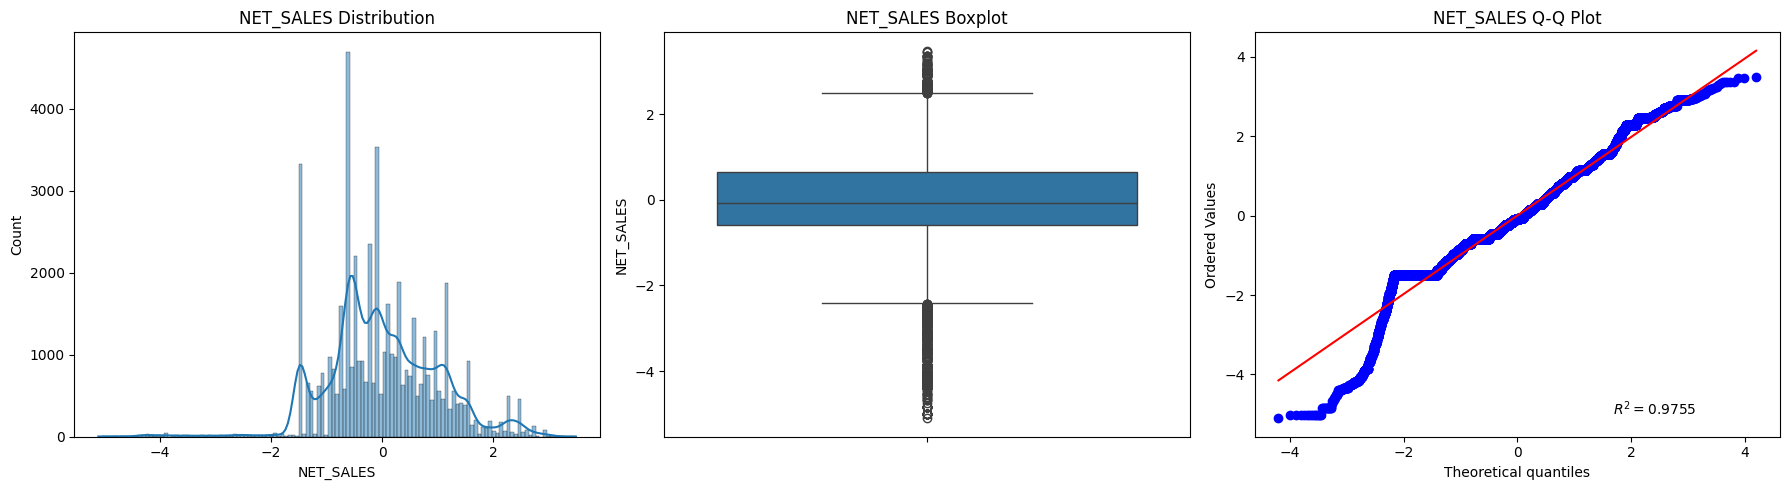


--- AGE ---
Basic Statistics:
count   52142.000
mean       -0.000
std         1.000
min       -11.213
25%        -0.411
50%        -0.191
75%         0.585
max         3.326
Name: AGE, dtype: float64
Shapiro-Wilk Test for AGE: p-value = 0.0000, Result = not normally distributed


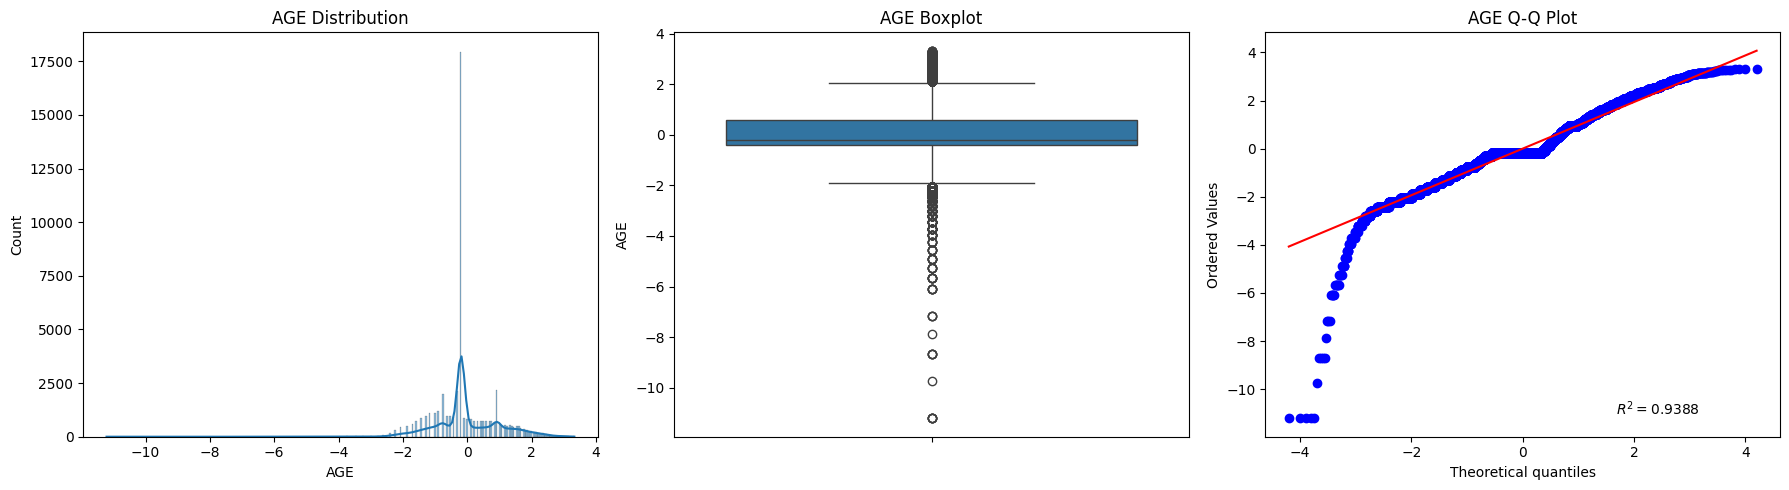

In [27]:
eda.numeric_analysis(df, num_var_names)

### 5.2 Outliers Treatment

In [28]:
for col in num_var_names:
    df[col] = prep.treat_outliers_truncation(df,col)

X_df, y_df, cat_var_df, num_var_df, cat_var_names, num_var_names = data_clean.assign_features(df, y_name=Y_NAME)


--- Numeric Analysis ---

--- DURATION ---
Basic Statistics:
count   52142.000
mean       -0.000
std         0.999
min        -2.484
25%        -0.688
50%         0.015
75%         0.701
max         2.785
Name: DURATION, dtype: float64
Shapiro-Wilk Test for DURATION: p-value = 0.0000, Result = not normally distributed


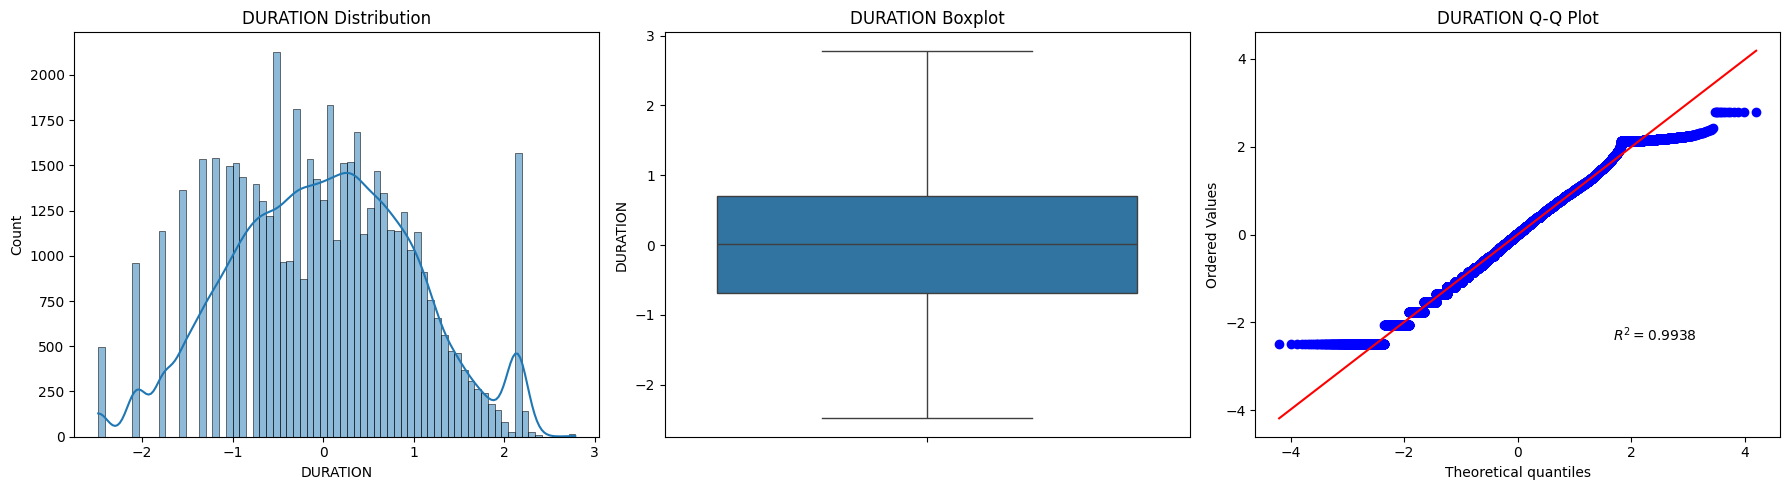


--- NET_SALES ---
Basic Statistics:
count   52142.000
mean        0.009
std         0.957
min        -2.427
25%        -0.584
50%        -0.077
75%         0.645
max         2.489
Name: NET_SALES, dtype: float64
Shapiro-Wilk Test for NET_SALES: p-value = 0.0000, Result = not normally distributed


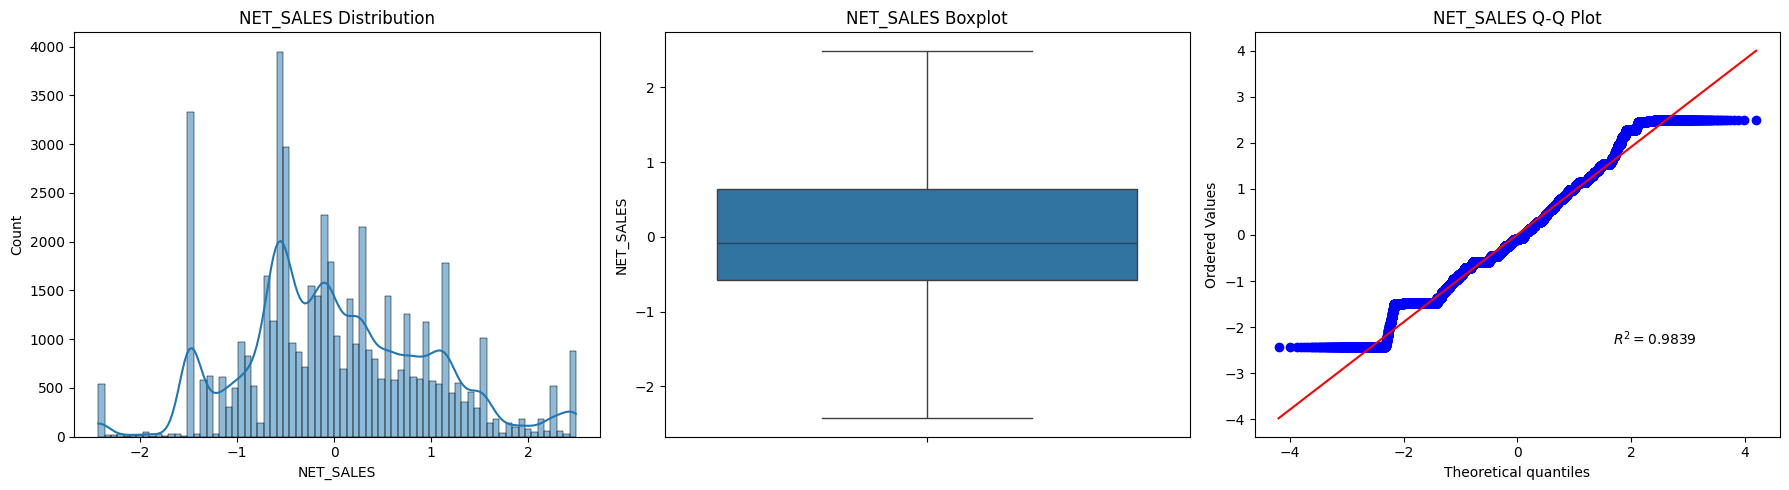


--- AGE ---
Basic Statistics:
count   52142.000
mean        0.002
std         0.934
min        -1.904
25%        -0.411
50%        -0.191
75%         0.585
max         2.078
Name: AGE, dtype: float64
Shapiro-Wilk Test for AGE: p-value = 0.0000, Result = not normally distributed


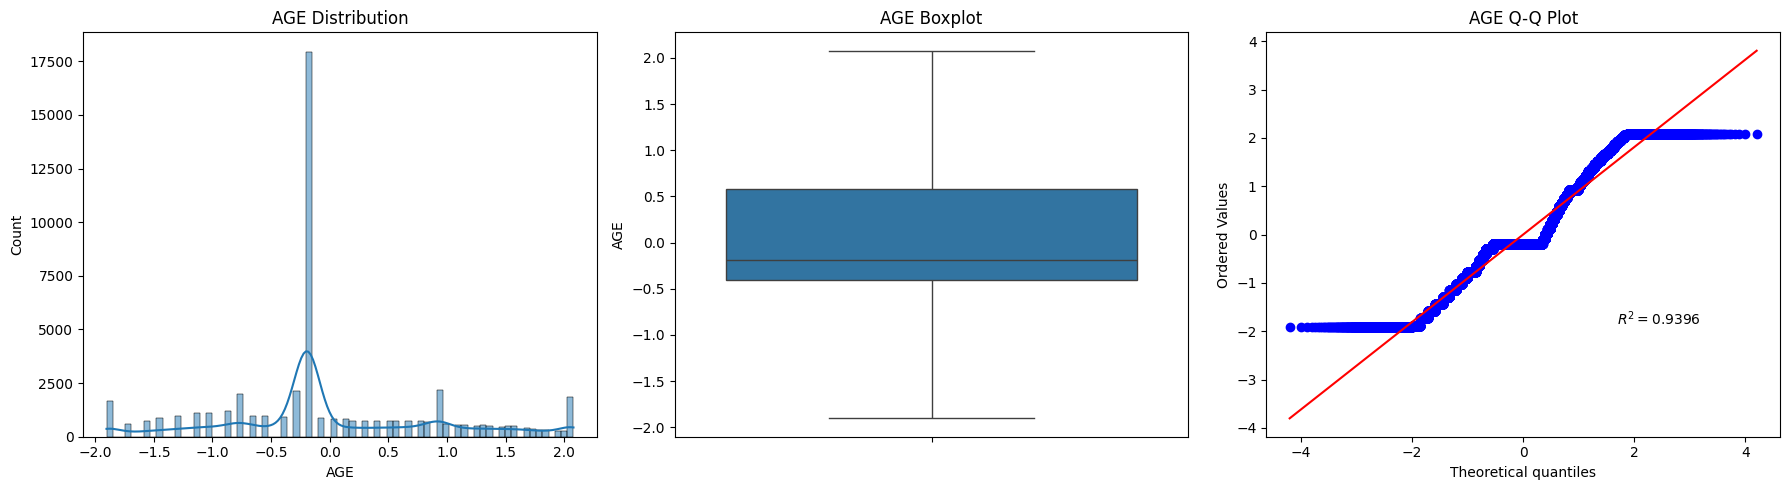

In [29]:
eda.numeric_analysis(df, num_var_names)

### 5.2 Categorical Encoding

In [30]:
df = prep.target_encoded(df, Y_NAME)
df = prep.cat_var_labelEncoder(df, CAT_VAR_LABEL_ENCODER)
df = prep.cat_var_ordinalEncoder(df, CAT_VAR_ORDINAL_ENCODER)
df = prep.onehot_encoder(df, CAT_VAR_ONEHOT_ENCODER)
df = prep.getdummies_encoder(df, CAT_VAR_GETDUMMIES_ENCODER, THRESHOLD_DESTINATION)
X_df, y_df, cat_var_df, num_var_df, cat_var_names, num_var_names = data_clean.assign_features(df, Y_NAME)

### 5.4 Oversampler

In [31]:
X_df, y_df = prep.oversampler(X_df, y_df)

Initial distribution of classes in target variable y(Claim): Counter({0: 51234, 1: 908})
Distribution of classes in target variable y(Claim) after oversampling: Counter({0: 51234, 1: 51234})


### 5.5 Features Selected

features_names:  ['DURATION', 'NET_SALES', 'AGE', 'AGENCY_TYPE', 'DISTRIBUTION_CHANNEL', 'COMMISION', 'GENDER', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW', '2 way Comprehensive Plan', '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan', 'Annual Travel Protect Gold', 'Annual Travel Protect Platinum', 'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan', 'Cancellation Plan', 'Child Comprehensive Plan', 'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan', 'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan', 'Single Trip Travel Protect Gold', 'Single Trip Travel Protect Platinum', 'Single Trip Travel Protect Silver', 'Spouse or Parents Comprehensive Plan', 'Ticket Protector', 'Travel Cruise Protect', 'Value Plan', 'CHINA', 'HONG KONG', 'INDIA', 'INDONESIA', 'JAPAN', 'KOREA, REPUBLIC OF', 'MALAYSIA', 'PHILIPPINES', 'SINGAPORE', 'TAIWAN, PROVINCE OF CHINA', 'THAILAND', 'UNITED KINGDOM', 'UNITED STATES

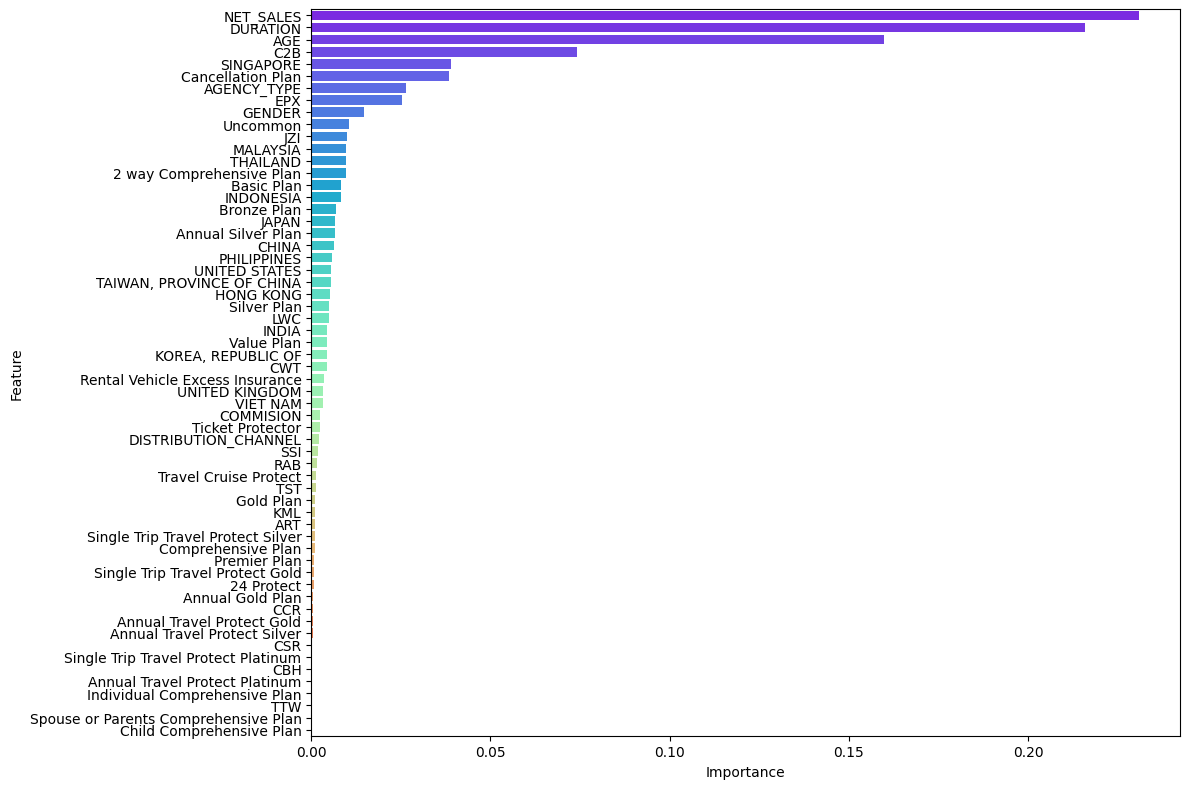

In [32]:
feature_names = X_df.columns.tolist()
print("features_names: ", feature_names)
X_train, X_test, y_train, y_test = prep.train_test(X_df,y_df, TEST_SIZE)
#kbest_features=prep.feature_selected_kbest(X_train, y_train)
#selected_percentile=prep.feature_selected_percentile(X_train, y_train)
selected_RFmodel=prep.feature_selected_RFmodel(X_train, y_train)
#selected_RFE=prep.feature_selected_RFE(X_train, y_train)
selected_boruta=prep.feature_selected_Boruta(X_train, y_train)

feature_selected_df = pd.DataFrame({'features_names': feature_names})

#feature_selected_df['Feature Selected Kbest'] = feature_selected_df['features_names'].apply(lambda x: 1 if x in kbest_features else 0)
#feature_selected_df['Feature Selected Percentile'] = feature_selected_df['features_names'].apply(lambda x: 1 if x in selected_percentile else 0)
feature_selected_df['Feature selected Random Forest Model'] = feature_selected_df['features_names'].apply(lambda x: 1 if x in selected_RFmodel else 0)
#feature_selected_df['Feature selected RFE'] = feature_selected_df['features_names'].apply(lambda x: 1 if x in selected_RFE else 0)
feature_selected_df['Feature selected Boruta'] = feature_selected_df['features_names'].apply(lambda x: 1 if x in selected_boruta else 0)

feature_selected_df = pd.DataFrame(feature_selected_df)
feature_selected_df.to_csv(FEATURE_SELECTED_PATH, index=False)
print(feature_selected_df)

FINAL_FEATURE_SELECTED=selected_boruta

In [33]:
X_train = X_train[FINAL_FEATURE_SELECTED]
X_test = X_test[FINAL_FEATURE_SELECTED]

### 5.6 Features Scaling

In [34]:
X_train, X_test=prep.feature_scaling(X_train, X_test)

In [35]:
#Data Preprocessing Saved
df.to_csv('data/processed_data/data_preprocessing.csv', index=False, sep=';')
print("Data Preprocessing: 'data/processed_data/data_preprocessing.csv")

Data Preprocessing: 'data/processed_data/data_preprocessing.csv


In [36]:
X_train.to_csv('data/processed_data/X_train.csv', index=False, sep=';')
print("Predictions saved: 'results/X_train.csv'")

Predictions saved: 'results/X_train.csv'


In [37]:
y_train.to_csv('data/processed_data/y_train.csv', index=False, sep=';')
print("Predictions saved: 'results/y_train.csv'")

Predictions saved: 'results/y_train.csv'


## 6. Modelling

### 6.1 Train LogisticRegression

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      5111
           1       0.79      0.64      0.71      5136

    accuracy                           0.73     10247
   macro avg       0.74      0.73      0.73     10247
weighted avg       0.74      0.73      0.73     10247

Accuracy Score: 0.7320191275495267
Precision Score: 0.7852028639618138
Recall Score: 0.6405763239875389
F1 Score: 0.7055543641432555
ROC AUC Score: 0.7322427697026326


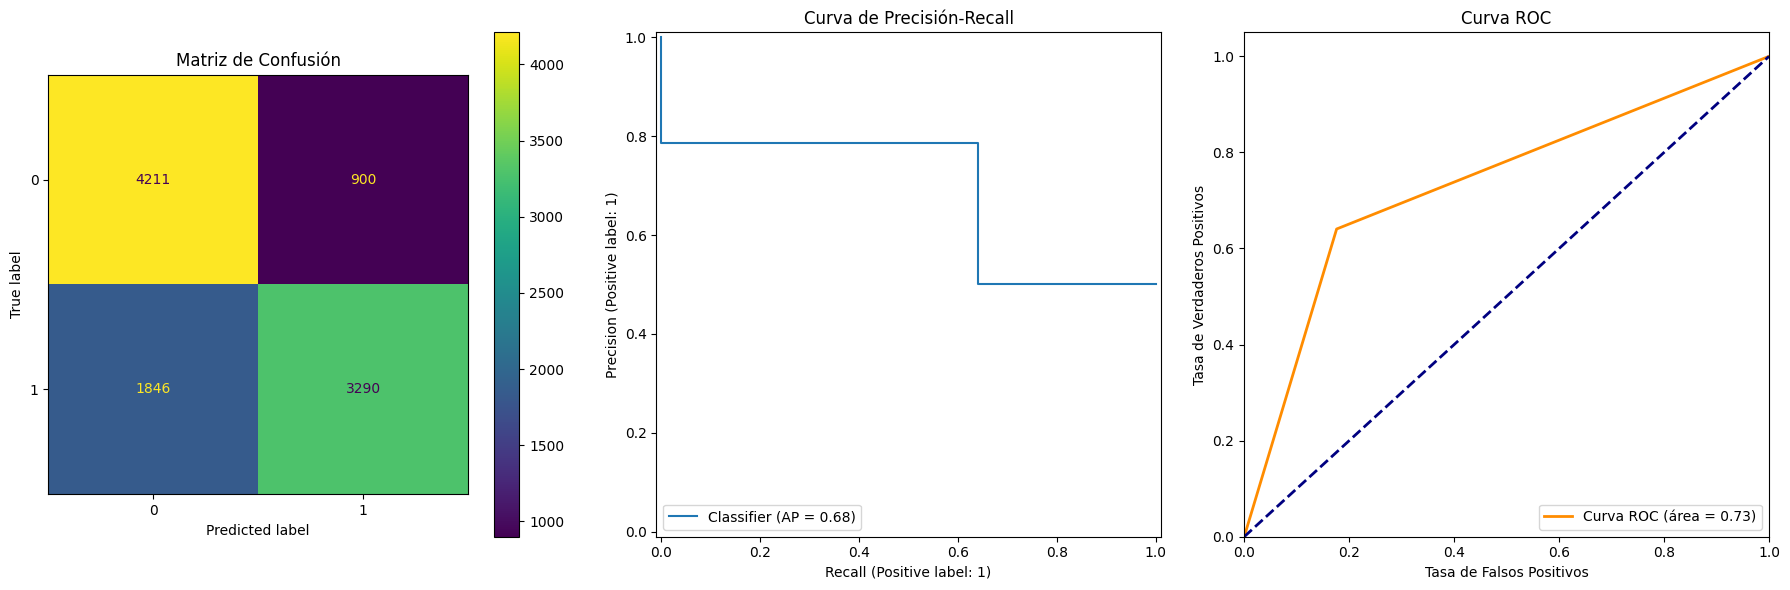

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')"],
 [0.7320191275495267],
 [0.7852028639618138],
 [0.6405763239875389],
 [0.7055543641432555],
 [0.7322427697026326])

In [38]:
mod.train_and_evaluate_model(LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', multi_class='ovr', l1_ratio= 0.5), X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [39]:
odd_ratio = mod.calculate_odds_ratio(models[0], FINAL_FEATURE_SELECTED)
odd_ratio

{'DURATION': 1.1145376121106063,
 'NET_SALES': 1.7462359020147689,
 'AGE': 0.8847904417063079,
 'C2B': 2.571184096378564}

In [40]:
LR=models[0]
paramsLR = LR.get_params()
paramsLR

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 6.2 Train DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      5111
           1       0.79      0.76      0.78      5136

    accuracy                           0.78     10247
   macro avg       0.78      0.78      0.78     10247
weighted avg       0.78      0.78      0.78     10247

Accuracy Score: 0.7825705084414951
Precision Score: 0.794093851132686
Recall Score: 0.7644080996884736
F1 Score: 0.778968253968254
ROC AUC Score: 0.7826149283415954


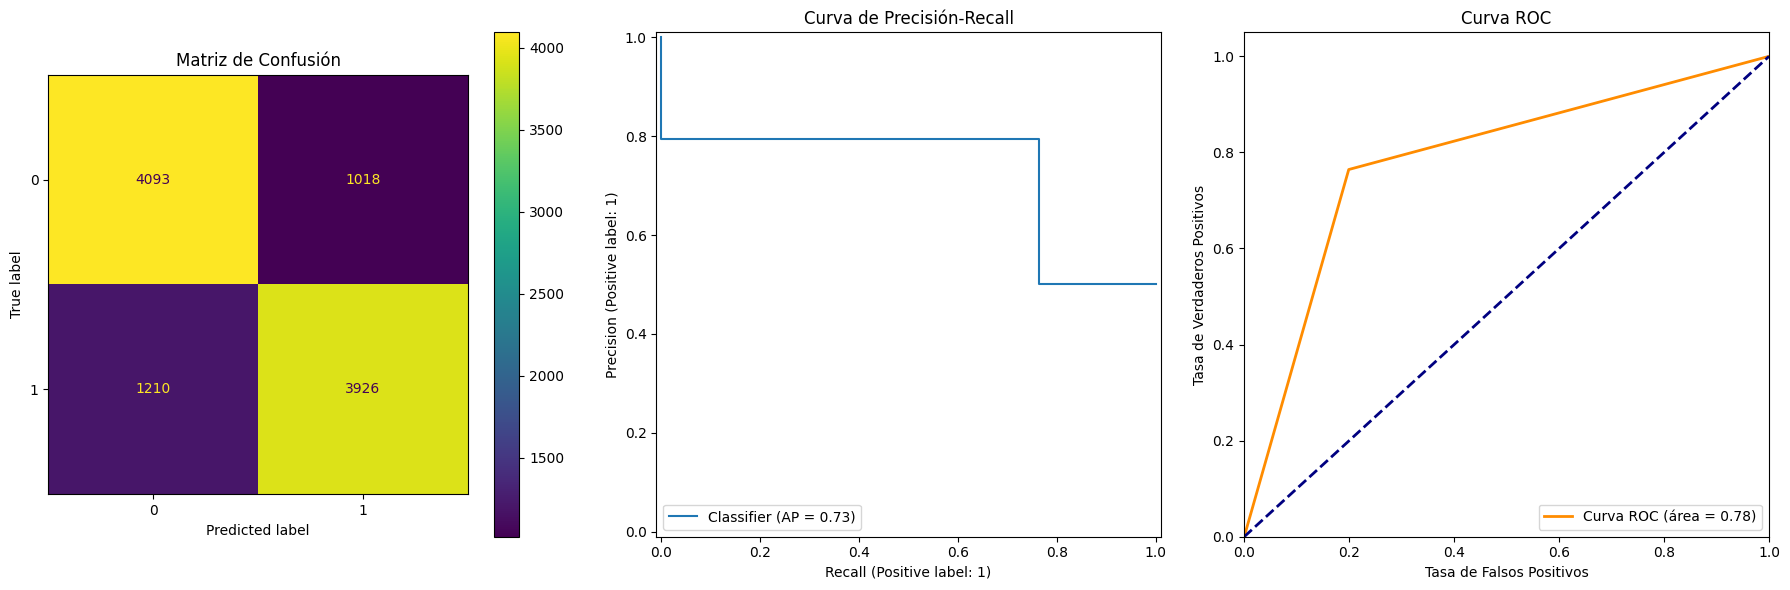

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')"],
 [0.7320191275495267, 0.7825705084414951],
 [0.7852028639618138, 0.794093851132686],
 [0.6405763239875389, 0.7644080996884736],
 [0.7055543641432555, 0.778968253968254],
 [0.7322427697026326, 0.7826149283415954])

In [41]:
mod.train_and_evaluate_model(DecisionTreeClassifier(criterion='gini', max_depth=10, max_features="sqrt"), X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [42]:
DT=models[1]
paramsDT = DT.get_params()
paramsDT

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [43]:
importance_df = mod.calculate_feature_importance(DT, X_train)
importance_df

Feature  Importance  Cumulative Percentage
3        C2B       0.530                  0.530
1  NET_SALES       0.266                  0.796
0   DURATION       0.118                  0.914
2        AGE       0.086                  1.000

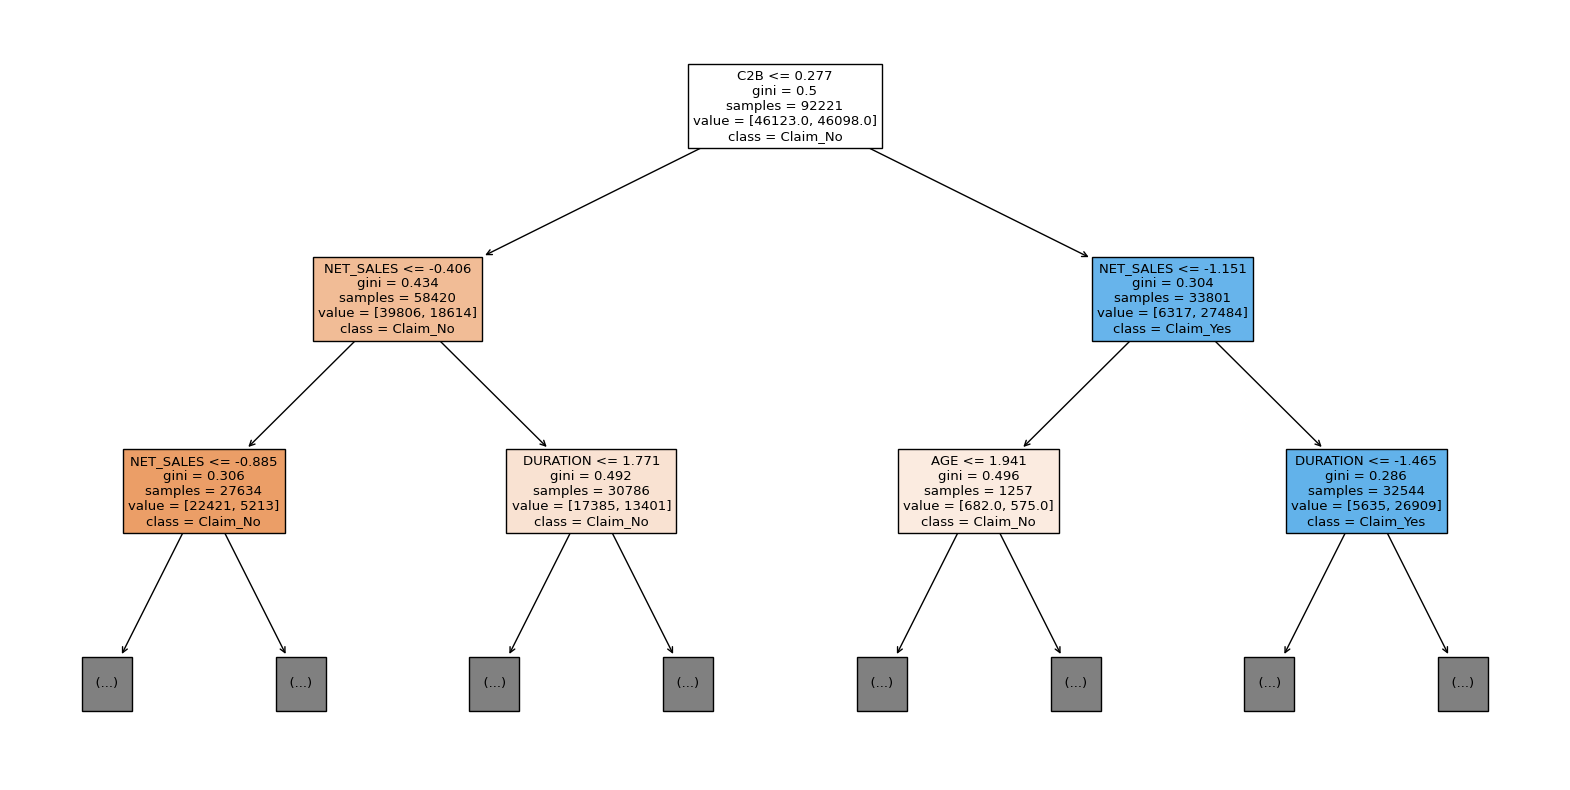

|--- C2B <= 0.28
|   |--- NET_SALES <= -0.41
|   |   |--- NET_SALES <= -0.88
|   |   |   |--- NET_SALES <= -0.90
|   |   |   |   |--- DURATION <= -0.13
|   |   |   |   |   |--- NET_SALES <= -0.94
|   |   |   |   |   |   |--- AGE <= -0.11
|   |   |   |   |   |   |   |--- DURATION <= -0.33
|   |   |   |   |   |   |   |   |--- AGE <= -0.17
|   |   |   |   |   |   |   |   |   |--- DURATION <= -0.37
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- DURATION >  -0.37
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- AGE >  -0.17
|   |   |   |   |   |   |   |   |   |--- NET_SALES <= -1.71
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- NET_SALES >  -1.71
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DURATION >  -0.33
|   |   |   |   |   |   |   |   |--- DURATION <= -0.29
|   |   |   |   |   |   |   |   |   |--- class: 1
|

In [44]:
evaluation.plot_decision_tree(DT, FINAL_FEATURE_SELECTED, class_names=["Claim_No", "Claim_Yes"], max_depth=2)

### 6.3 Train RandomForestClassifier

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5111
           1       0.96      0.95      0.96      5136

    accuracy                           0.96     10247
   macro avg       0.96      0.96      0.96     10247
weighted avg       0.96      0.96      0.96     10247

Accuracy Score: 0.9569630135649458
Precision Score: 0.9609267622226586
Recall Score: 0.9528816199376947
F1 Score: 0.9568872812591651
ROC AUC Score: 0.9569729954511405


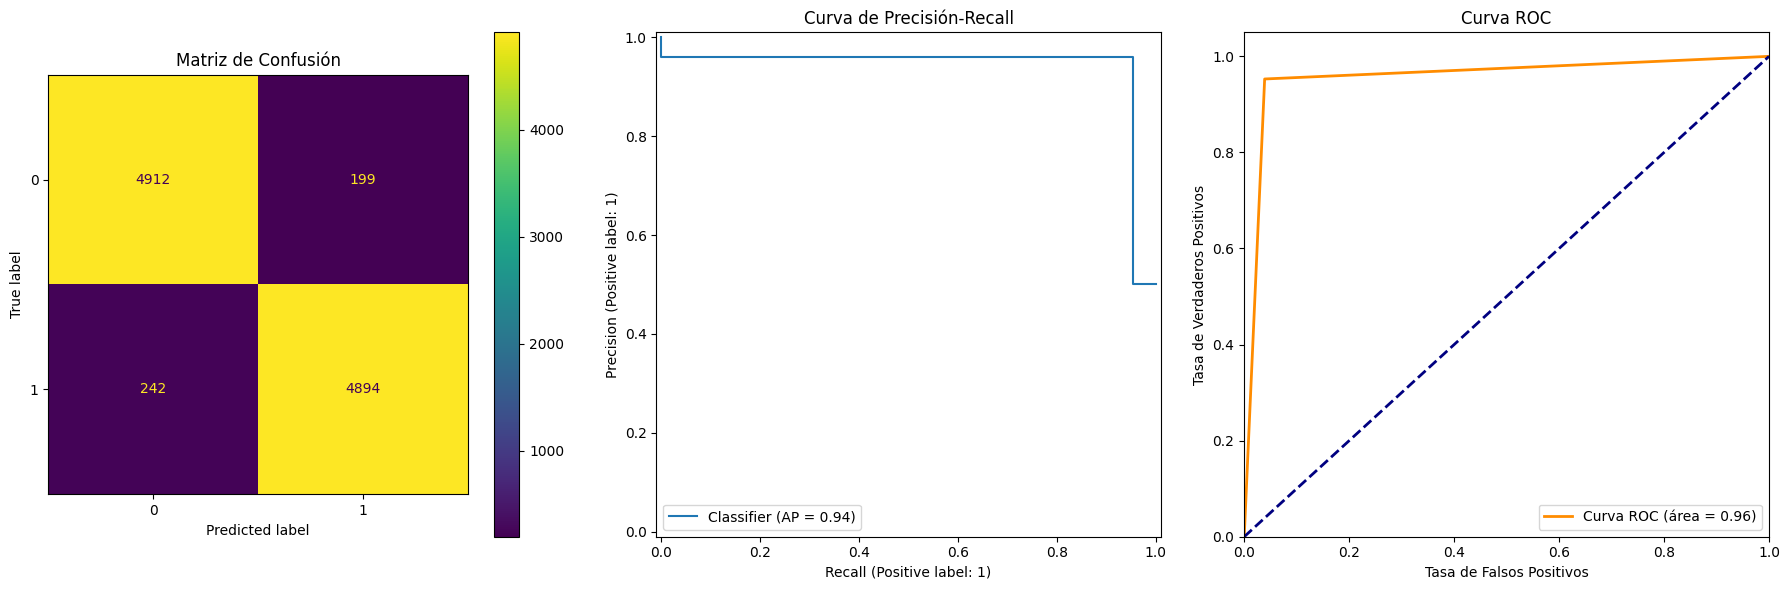

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')"],
 [0.7320191275495267, 0.7825705084414951, 0.9569630135649458],
 [0.7852028639618138, 0.794093851132686, 0.9609267622226586],
 [0.6405763239875389, 0.7644080996884736, 0.9528816199376947],
 [0.7055543641432555, 0.778968253968254, 0.9568872812591651],
 [0.7322427697026326, 0.7826149283415954, 0.9569729954511405])

In [45]:
mod.train_and_evaluate_model(RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='log2', class_weight='balanced_subsample'), X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [46]:
RF=models[2]
paramsRF = RF.get_params()
paramsRF

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
importance_df = mod.calculate_feature_importance(RF, X_train)
importance_df

Feature  Importance  Cumulative Percentage
1  NET_SALES       0.344                  0.344
0   DURATION       0.281                  0.625
2        AGE       0.230                  0.855
3        C2B       0.145                  1.000

### 6.4 Train XGBClassifier

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5111
           1       0.87      0.80      0.83      5136

    accuracy                           0.84     10247
   macro avg       0.84      0.84      0.84     10247
weighted avg       0.84      0.84      0.84     10247

Accuracy Score: 0.8397579779447644
Precision Score: 0.8702840186519711
Recall Score: 0.7994548286604362
F1 Score: 0.8333671605439416
ROC AUC Score: 0.839856547572245


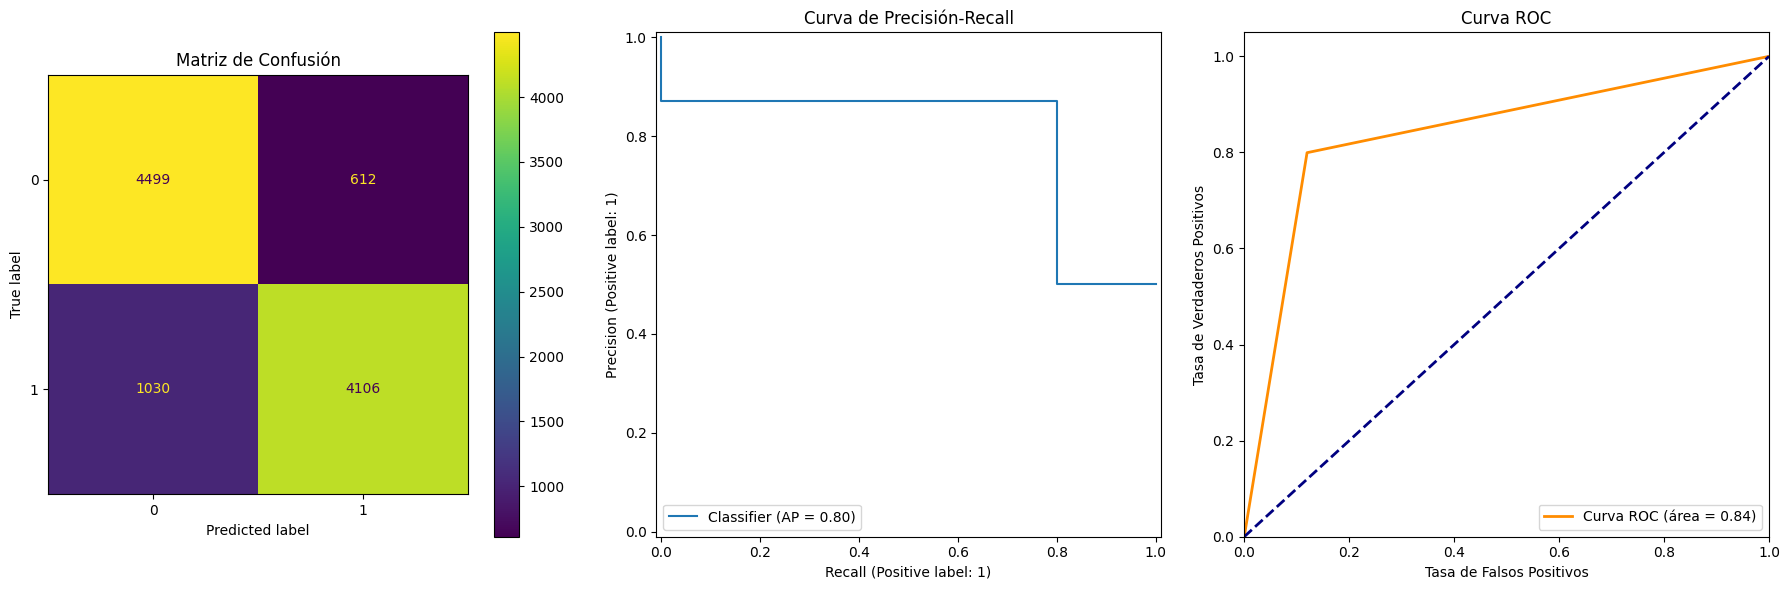

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')",
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=0.4, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=2, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, random_

In [48]:
mod.train_and_evaluate_model(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth= 5, min_child_weight=2, gamma=0.4, subsample=0.7, colsample_bytree=0.8), X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [49]:
XGB=models[3]
paramsXGB = XGB.get_params()
paramsXGB

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.4,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.7,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
importance_df = mod.calculate_feature_importance(XGB, X_train)
importance_df

Feature  Importance  Cumulative Percentage
3        C2B       0.656                  0.656
2        AGE       0.139                  0.795
1  NET_SALES       0.115                  0.910
0   DURATION       0.090                  1.000

## 7. Evaluation

### 7.1 Models Performance Comparation

In [51]:
model_perfs = pd.DataFrame(list(zip(model_names,accuracy_scores,precision_scores,recall_scores,f1_scores,roc_auc_scores)),columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC Score']).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0  RandomForestClassifier(class_weight='balanced_...     0.957      0.961   
1  XGBClassifier(base_score=None, booster=None, c...     0.840      0.870   
2  DecisionTreeClassifier(max_depth=10, max_featu...     0.783      0.794   
3  LogisticRegression(C=0.1, l1_ratio=0.5, multi_...     0.732      0.785   

   Recall    F1  ROC AUC Score  
0   0.953 0.957          0.957  
1   0.799 0.833          0.840  
2   0.764 0.779          0.783  
3   0.641 0.706          0.732

### 7.2 Hyperparameter Tuning

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END C=0.9, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.9, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.5, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.5, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, multi_class=ovr, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, multi_class=ovr, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.8, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.8, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=elast

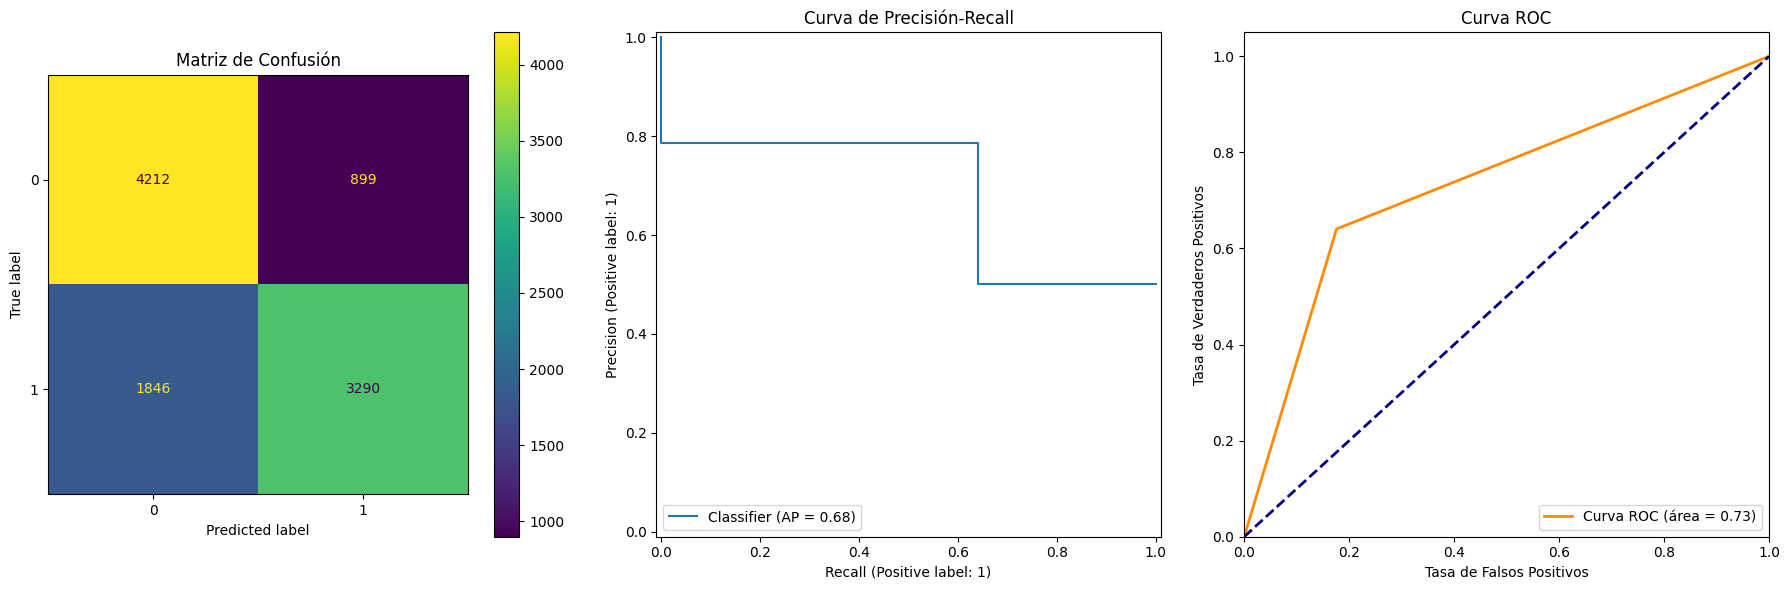

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')",
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=0.4, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=2, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, random_

In [52]:
grid_lr=evaluation.hyperparameter_tuning_LRmodel(LogisticRegression(), X_train, y_train)
mod.train_and_evaluate_model(grid_lr, X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [53]:
LR_tunning=models[4]
paramsLR_tunning = LR_tunning.get_params()
paramsLR_tunning

{'C': 0.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_

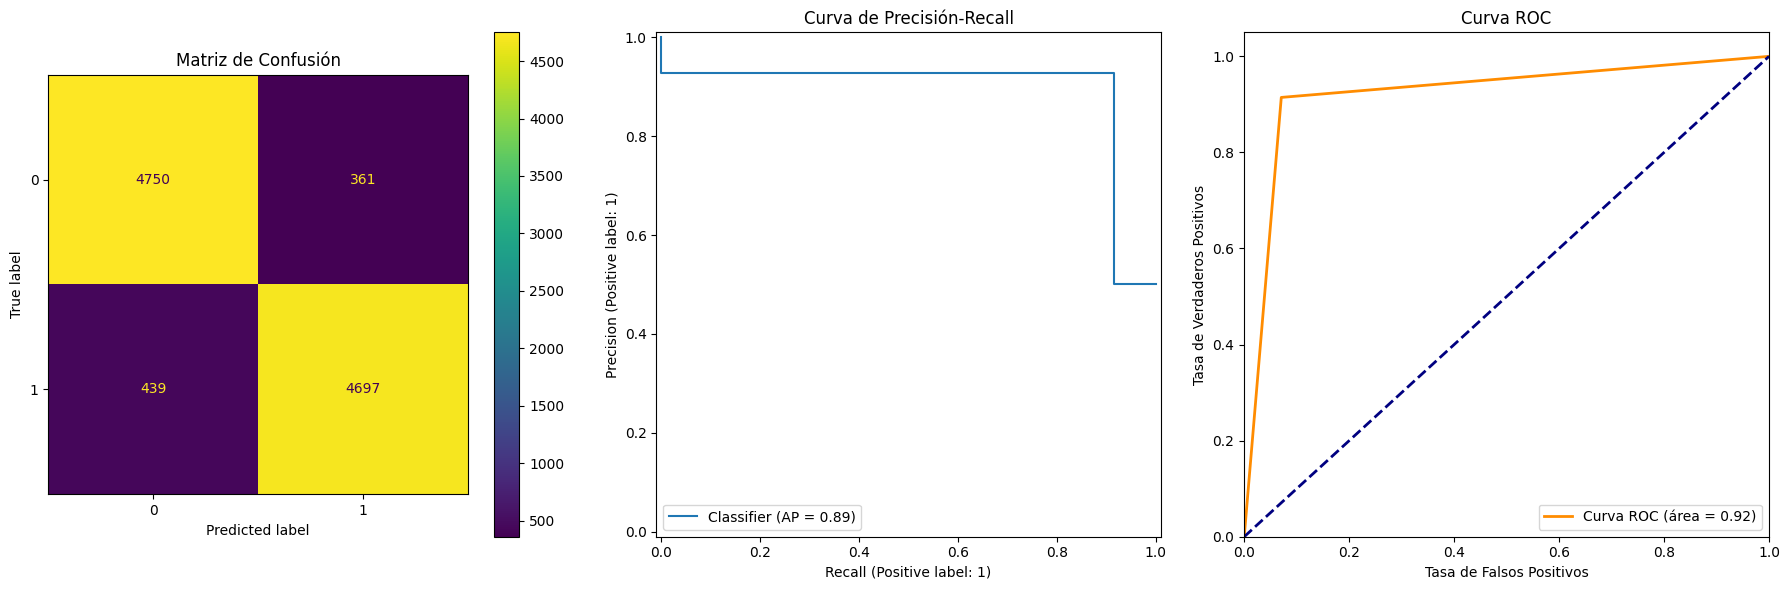

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')",
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=0.4, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=2, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, random_

In [54]:
grid_dt = evaluation.hyperparameter_tuning_DTmodel(DecisionTreeClassifier(), X_train, y_train)
mod.train_and_evaluate_model(grid_dt, X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [55]:
DT_tunning=models[5]
paramsDT_tunning = DT_tunning.get_params()
paramsDT_tunning

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [56]:
importance_df = mod.calculate_feature_importance(DT_tunning, X_train)
importance_df

Feature  Importance  Cumulative Percentage
1  NET_SALES       0.399                  0.399
2        AGE       0.256                  0.656
0   DURATION       0.243                  0.899
3        C2B       0.101                  1.000

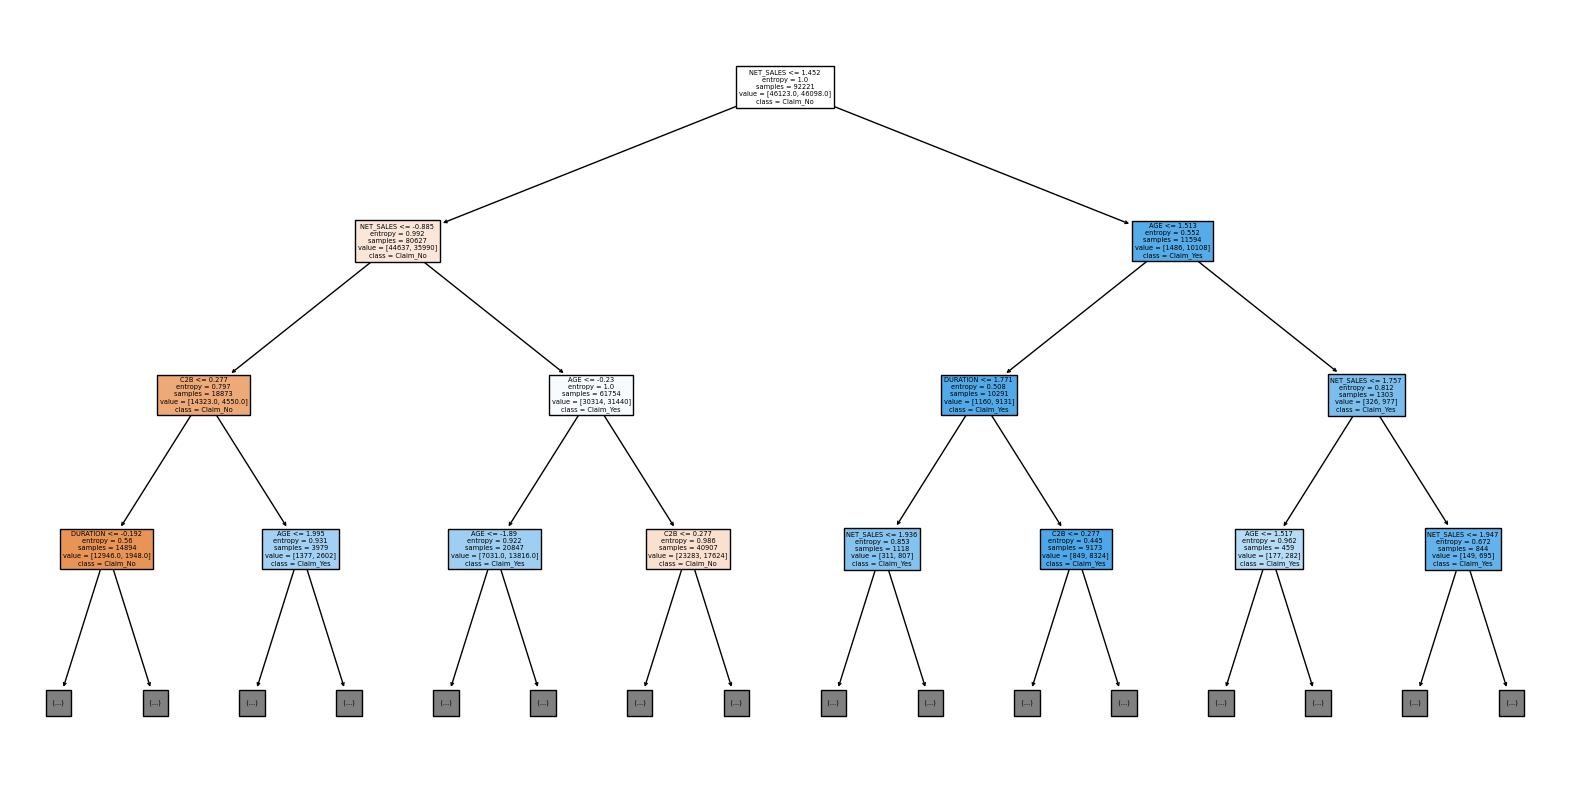

|--- NET_SALES <= 1.45
|   |--- NET_SALES <= -0.88
|   |   |--- C2B <= 0.28
|   |   |   |--- DURATION <= -0.19
|   |   |   |   |--- AGE <= -0.12
|   |   |   |   |   |--- DURATION <= -0.33
|   |   |   |   |   |   |--- DURATION <= -1.63
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DURATION >  -1.63
|   |   |   |   |   |   |   |--- DURATION <= -1.47
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- DURATION >  -1.47
|   |   |   |   |   |   |   |   |--- NET_SALES <= -1.71
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- NET_SALES >  -1.71
|   |   |   |   |   |   |   |   |   |--- NET_SALES <= -1.61
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- NET_SALES >  -1.61
|   |   |   |   |   |   |   |   |   |   |--- NET_SALES <= -1.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- NET_SA

In [57]:
evaluation.plot_decision_tree(DT_tunning, FINAL_FEATURE_SELECTED, class_names=["Claim_No", "Claim_Yes"], max_depth=3)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600; total time=  55.5s
[CV] END class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600; total time= 2.0min
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=600; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=600; total time=   0.0s
[CV] END class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=800; total time= 2.2min
[CV] END class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=800; total time= 1.3min
[CV] END class_weight=balanced, criterion=entropy, max_

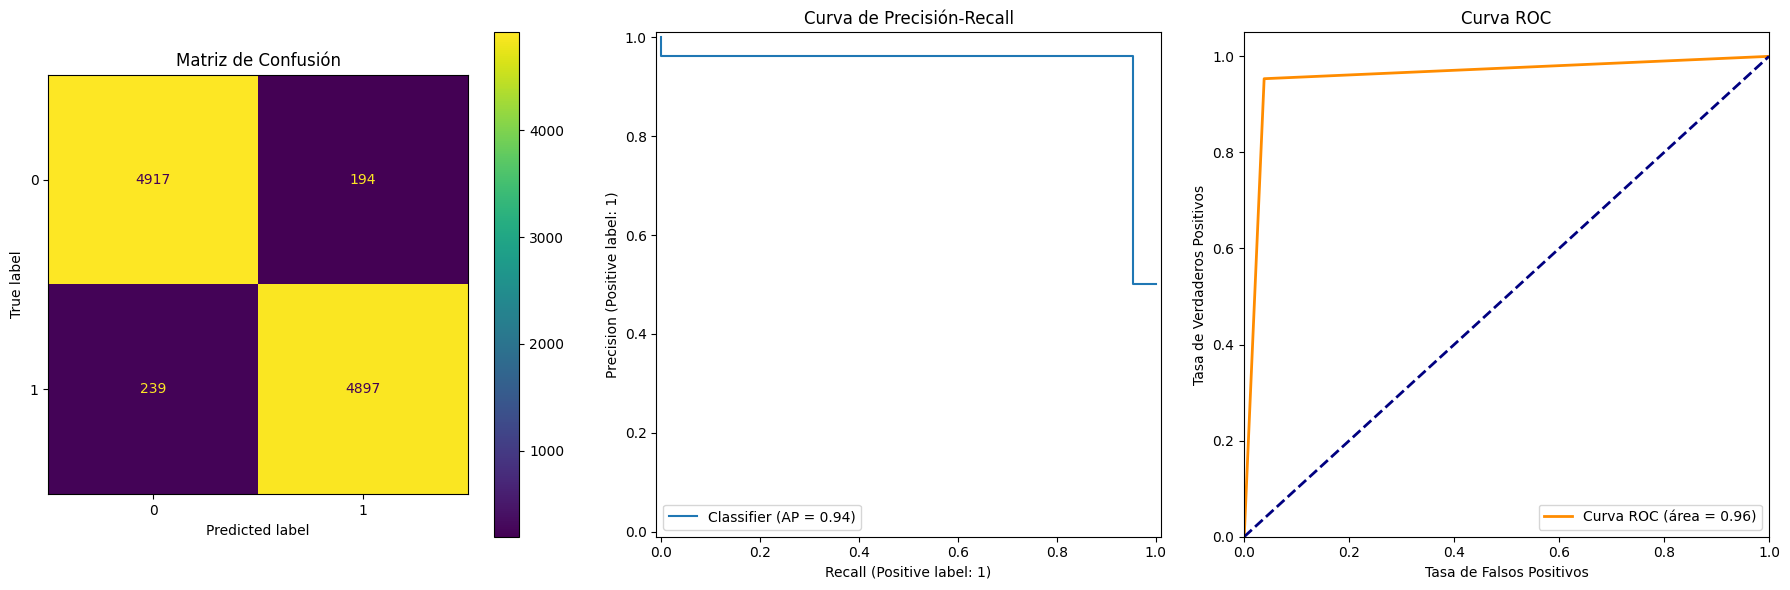

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')",
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=0.4, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=2, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, random_

In [58]:
grid_rf = evaluation.hyperparameter_tuning_RFmodel(RandomForestClassifier(), X_train, y_train)
mod.train_and_evaluate_model(grid_rf, X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [59]:
RF_tunning=models[6]
paramsRF_tunning = RF_tunning.get_params()
paramsRF_tunning

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
importance_df = mod.calculate_feature_importance(RF_tunning, X_train)
importance_df

Feature  Importance  Cumulative Percentage
1  NET_SALES       0.346                  0.346
0   DURATION       0.281                  0.627
2        AGE       0.231                  0.858
3        C2B       0.142                  1.000

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max

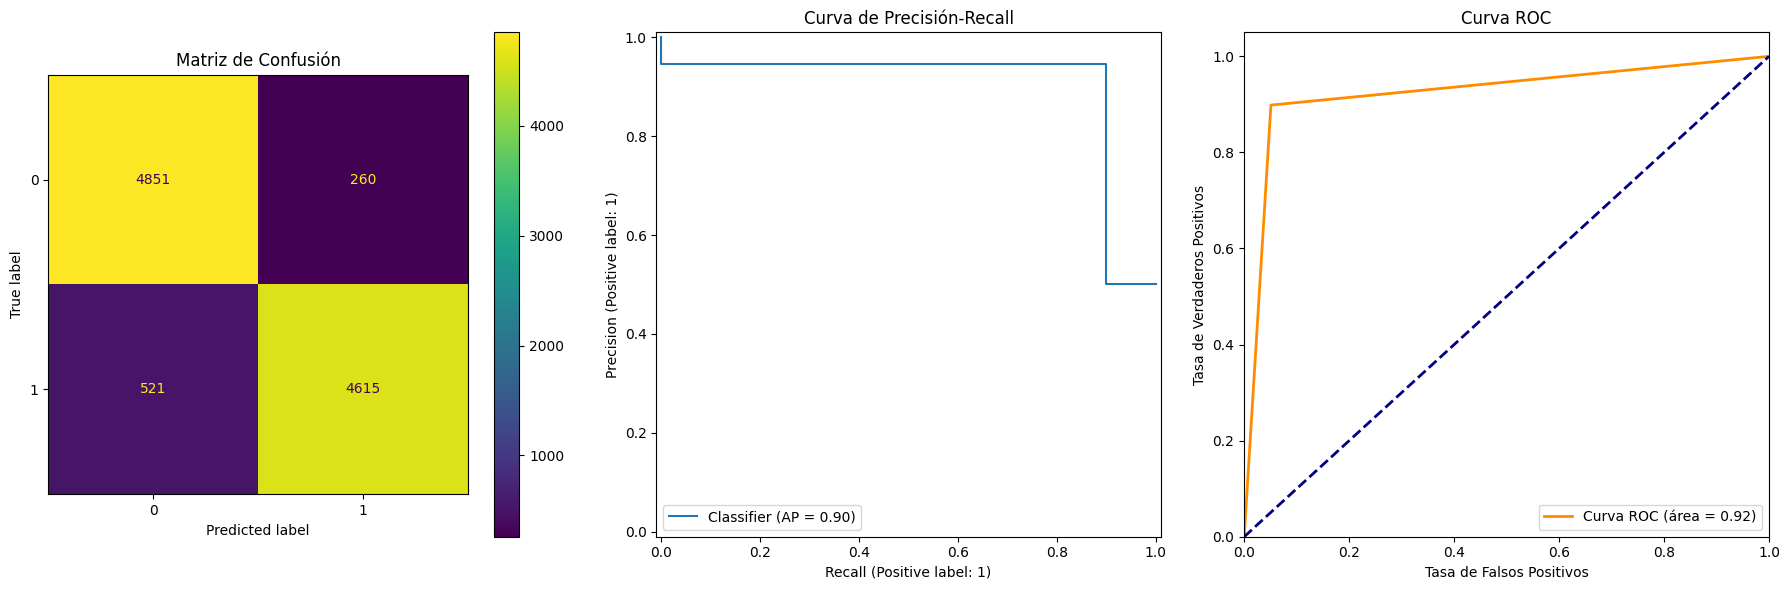

Models saved in /models


(["LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr')",
  "DecisionTreeClassifier(max_depth=10, max_features='sqrt')",
  "RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_features='log2')",
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=0.4, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=2, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, random_

In [61]:
grid_xgb = evaluation.hyperparameter_tuning_XGBmodel(XGBClassifier(), X_train, y_train)
mod.train_and_evaluate_model(grid_xgb, X_train, X_test, y_train, y_test, models, model_names, accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores)

In [62]:
XGB_tunning=models[7]
paramsXGB_tunning = XGB_tunning.get_params()
paramsXGB_tunning

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.3,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [63]:
importance_df = mod.calculate_feature_importance(XGB_tunning, X_train)
importance_df

Feature  Importance  Cumulative Percentage
3        C2B       0.613                  0.613
2        AGE       0.159                  0.772
0   DURATION       0.119                  0.891
1  NET_SALES       0.109                  1.000

### 7.3 Hyperparameter-Optimized Models Performance Comparison

In [64]:
model_perfs = pd.DataFrame(list(zip(model_names,accuracy_scores,precision_scores,recall_scores,f1_scores,roc_auc_scores)),columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC Score']).sort_values('Accuracy',ascending=False).reset_index(drop=True)
evaluation.save_results(model_perfs)
model_perfs

Results saved in /results


Model  Accuracy  Precision  \
0  RandomForestClassifier(class_weight='balanced'...     0.958      0.962   
1  RandomForestClassifier(class_weight='balanced_...     0.957      0.961   
2  XGBClassifier(base_score=None, booster=None, c...     0.924      0.947   
3  DecisionTreeClassifier(criterion='entropy', ma...     0.922      0.929   
4  XGBClassifier(base_score=None, booster=None, c...     0.840      0.870   
5  DecisionTreeClassifier(max_depth=10, max_featu...     0.783      0.794   
6  LogisticRegression(C=0.5, multi_class='ovr', p...     0.732      0.785   
7  LogisticRegression(C=0.1, l1_ratio=0.5, multi_...     0.732      0.785   

   Recall    F1  ROC AUC Score  
0   0.953 0.958          0.958  
1   0.953 0.957          0.957  
2   0.899 0.922          0.924  
3   0.915 0.922          0.922  
4   0.799 0.833          0.840  
5   0.764 0.779          0.783  
6   0.641 0.706          0.732  
7   0.641 0.706          0.732

### 7.4 Cross Validation

In [65]:
for model in models:
    evaluation.perform_cross_validation(model, X_df, y_df)


Modelo: LogisticRegression
Scores de validación cruzada: [0.83809896 0.82799844 0.76778569 0.76118675 0.75537989]
Mean score: 0.7900899440483313
Standard deviation: 0.035438910037824914

Modelo: DecisionTreeClassifier
Scores de validación cruzada: [0.80077096 0.80335708 0.77076217 0.75298883 0.72473528]
Mean score: 0.7705228625363609
Standard deviation: 0.029654800425263424

Modelo: RandomForestClassifier
Scores de validación cruzada: [0.94925344 0.9673563  0.95135162 0.9589128  0.94676231]
Mean score: 0.9547272926232905
Standard deviation: 0.007507456343641176

Modelo: XGBClassifier
Scores de validación cruzada: [0.88030643 0.8684493  0.81462867 0.82037769 0.80095642]
Mean score: 0.8369437038559001
Standard deviation: 0.031433760898068416

Modelo: LogisticRegression
Scores de validación cruzada: [0.83990436 0.83131648 0.77071338 0.76289465 0.75801493]
Mean score: 0.7925687607063421
Standard deviation: 0.03548019995348237

Modelo: DecisionTreeClassifier
Scores de validación cruzada: [

### 7.5 Best Performing Model

In [66]:
best_model_name = model_perfs.iloc[0]['Model']
index_best_model = model_names.index(best_model_name)
best_model=models[index_best_model]

In [67]:
mod.save_model(best_model, "best_model")

Models saved in /models


## 8. Deployment

In [68]:
best_model_deployment = mod.load_best_model()


In [69]:
predictions = best_model_deployment.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])
y_test_df = pd.DataFrame(y_test, columns=['CLAIM'])

X_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
predictions_df.reset_index(drop=True, inplace=True)

results_df = pd.concat([X_test, y_test_df, predictions_df], axis=1)
results_df.to_csv('data/processed_data/predictions.csv', index=False, sep=';')
print("Predictions saved: 'results/predictions.csv'")

Predictions saved: 'results/predictions.csv'



--- Correlation Analysis ---


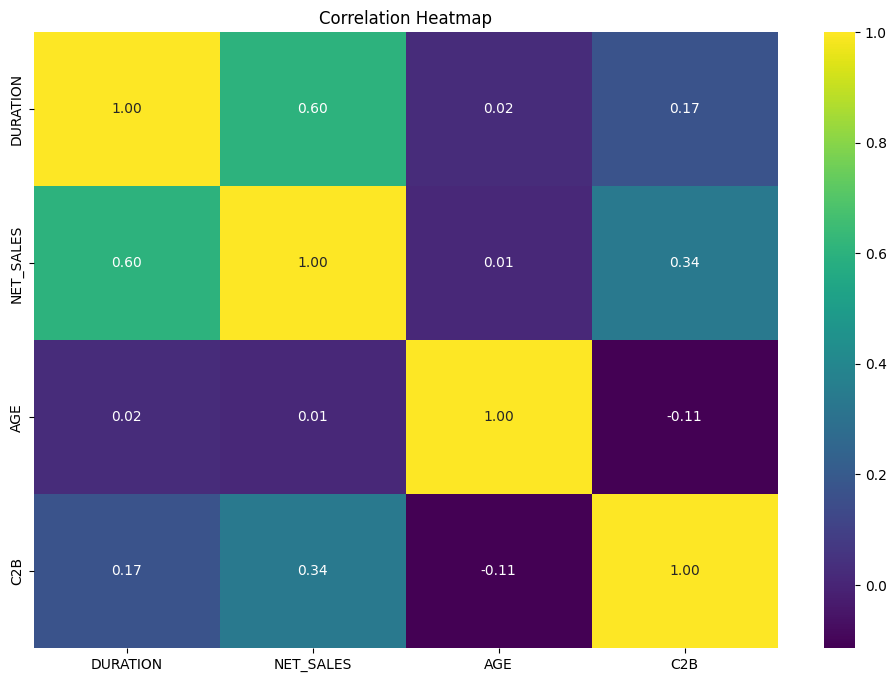

In [70]:
eda.correlation_analysis(results_df, X_train.columns)

In [71]:
results_df

DURATION  NET_SALES    AGE    C2B  CLAIM  Prediction
0        -1.996     -1.130  0.774 -0.761      1           1
1         1.774      1.947  0.352  1.315      1           1
2         1.780      0.915  1.943 -0.761      0           0
3        -0.080      0.763 -1.669  1.315      1           1
4        -0.922     -0.719 -0.585 -0.761      0           0
...         ...        ...    ...    ...    ...         ...
10242     0.266     -2.584  1.036 -0.761      0           0
10243    -0.252     -0.771 -0.118 -0.761      1           0
10244    -1.325     -1.151  1.513 -0.761      0           0
10245     0.746      0.692 -0.840 -0.761      0           0
10246    -0.547     -1.716 -1.876 -0.761      0           0

[10247 rows x 6 columns]